In [44]:
utils.ensure_col_types(beers_adv,
                       ['beer_id', 'brewery_id', 'nbr_ratings', 'nbr_reviews', 'nbr_matched_valid_ratings'],
                       ['abv'],
                       ['beer_name', 'brewery_name', 'style'])

In [46]:
beers_adv.head()

beer_id           beer_name  brewery_id            brewery_name  \
0   166064    Nashe Moskovskoe       39912  Abdysh-Ata (Абдыш Ата)   
1   166065     Nashe Pivovskoe       39912  Abdysh-Ata (Абдыш Ата)   
2   166066  Nashe Shakhterskoe       39912  Abdysh-Ata (Абдыш Ата)   
3   166067  Nashe Zhigulevskoe       39912  Abdysh-Ata (Абдыш Ата)   
4   166063              Zhivoe       39912  Abdysh-Ata (Абдыш Ата)   

             style  nbr_ratings  nbr_reviews  avg  ba_score  bros_score  abv  \
0  Euro Pale Lager            0            0  NaN       NaN         NaN  4.7   
1  Euro Pale Lager            0            0  NaN       NaN         NaN  3.8   
2  Euro Pale Lager            0            0  NaN       NaN         NaN  4.8   
3  Euro Pale Lager            0            0  NaN       NaN         NaN  4.0   
4  Euro Pale Lager            0            0  NaN       NaN         NaN  4.5   

   avg_computed  zscore  nbr_matched_valid_ratings  avg_matched_valid_ratings  
0           NaN     NaN                          0                        NaN  
1           NaN     NaN                          0                        NaN  
2           NaN     NaN                          0                        NaN  
3           NaN     NaN                          0                        NaN  
4           NaN     NaN                          0                        NaN

Keep only beers that have atleast one review and one rating. Only beers that have been tried are wanted

In [49]:
beers_adv_filt = beers_adv[(beers_adv['nbr_ratings'] != 0) & (beers_adv['nbr_reviews'] != 0)].copy()

In [51]:
beers_adv_filt['nbr_ratings'].describe()

count    166649.000000
mean         49.216653
std         298.336124
min           1.000000
25%           2.000000
50%           5.000000
75%          17.000000
max       16509.000000
Name: nbr_ratings, dtype: float64

In [53]:
beers_adv_filt['nbr_reviews'].describe()

count    166649.000000
mean         15.539163
std          88.846266
min           1.000000
25%           1.000000
50%           2.000000
75%           5.000000
max        3899.000000
Name: nbr_reviews, dtype: float64

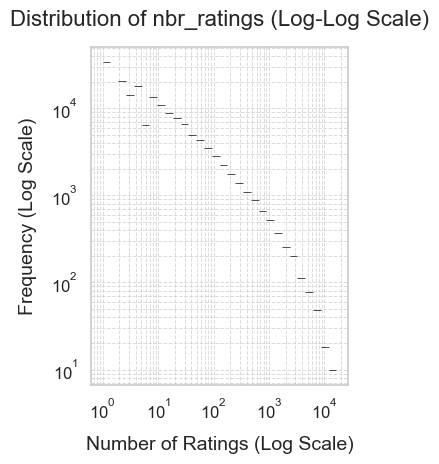

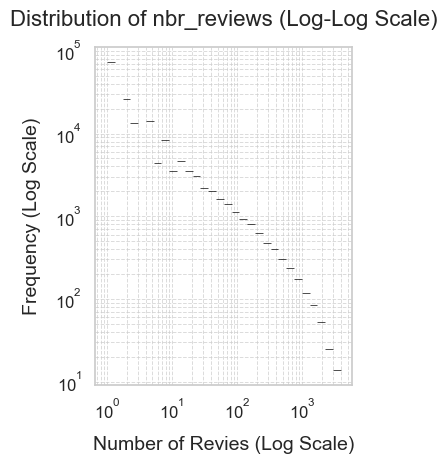

In [55]:
plt.subplot(121)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_ratings'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Ratings (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_ratings (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

plt.subplot(122)
sns.set_theme(style="whitegrid")
sns.histplot(beers_adv_filt['nbr_reviews'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Revies (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_reviews (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Duplicates dealing:

In [57]:
print(beers_adv_filt['beer_id'].duplicated().any())

duplicates = beers_adv_filt['beer_id'].duplicated()
duplicates.describe()

False


count     166649
unique         1
top        False
freq      166649
Name: beer_id, dtype: object

In [58]:
duplicated_beer_id_rows = beers_adv_filt[beers_adv_filt['beer_id'].duplicated(keep=False)]
duplicated_beer_id_rows.head()

Empty DataFrame
Columns: [beer_id, beer_name, brewery_id, brewery_name, style, nbr_ratings, nbr_reviews, avg, ba_score, bros_score, abv, avg_computed, zscore, nbr_matched_valid_ratings, avg_matched_valid_ratings]
Index: []

Once seen that duplications are repeated entries they can be removed easily:

In [63]:
beers_adv_filt_unique = beers_adv_filt.drop_duplicates(subset='beer_id', keep='first').reset_index(drop=True)

utils.dataset_information(beers_adv_filt_unique, "Filtered + Unique Beers_BA")



########################################################
We are starting analysing dataset Filtered + Unique Beers_BA
- Dimension of starting dataset: (166649, 15)
- Columns of dataset:  Index(['beer_id', 'beer_name', 'brewery_id', 'brewery_name', 'style',
       'nbr_ratings', 'nbr_reviews', 'avg', 'ba_score', 'bros_score', 'abv',
       'avg_computed', 'zscore', 'nbr_matched_valid_ratings',
       'avg_matched_valid_ratings'],
      dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du Gabon (SOBRAGA)   Euro Pale Lager         

In [65]:
beers_adv_filt_unique['beer_id'].duplicated().describe()

count     166649
unique         1
top        False
freq      166649
Name: beer_id, dtype: object

### Breweries

In [68]:
utils.dataset_information(breweries_adv, "Breweries_BA")



########################################################
We are starting analysing dataset Breweries_BA
- Dimension of starting dataset: (16758, 4)
- Columns of dataset:  Index(['id', 'location', 'name', 'nbr_beers'], dtype='object')
- Are all the id unique? Answer: True
- Are there some values that are NaN inside the dataset? Answer: False
Head: 
       id    location                    name  nbr_beers
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5
1  39913  Kyrgyzstan             Arpa (АРПА)          1
2  39914  Kyrgyzstan               Bear Beer          4
3  39915  Kyrgyzstan             Blonder Pub          4
4  39916  Kyrgyzstan            Kellers Bier          2


In [70]:
breweries_adv['nbr_beers'].describe()

count    16758.000000
mean        21.056331
std         69.417841
min          0.000000
25%          2.000000
50%          6.000000
75%         18.000000
max       1196.000000
Name: nbr_beers, dtype: float64

Drop breweries with null `nbr_beers`:

In [73]:
breweries_adv_filt = breweries_adv[(breweries_adv['nbr_beers'] != 0)].copy()
breweries_adv_filt['nbr_beers'].describe()

count    14522.000000
mean        24.298444
std         74.041044
min          1.000000
25%          3.000000
50%          8.000000
75%         21.000000
max       1196.000000
Name: nbr_beers, dtype: float64

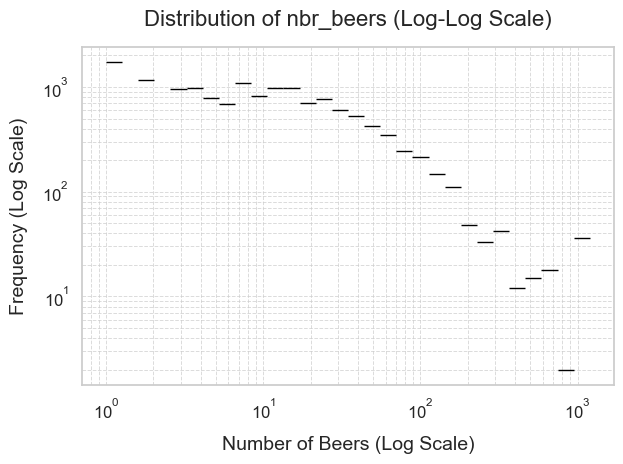

In [75]:
sns.set_theme(style="whitegrid")
sns.histplot(breweries_adv_filt['nbr_beers'], log_scale=(True, True), bins=30, color="steelblue", edgecolor="black")
plt.xlabel('Number of Beers (Log Scale)', fontsize=14, labelpad=10)
plt.ylabel('Frequency (Log Scale)', fontsize=14, labelpad=10)
plt.title('Distribution of nbr_beers (Log-Log Scale)', fontsize=16, pad=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.7, alpha=0.7)
plt.tight_layout()
plt.show()

Location analysis:

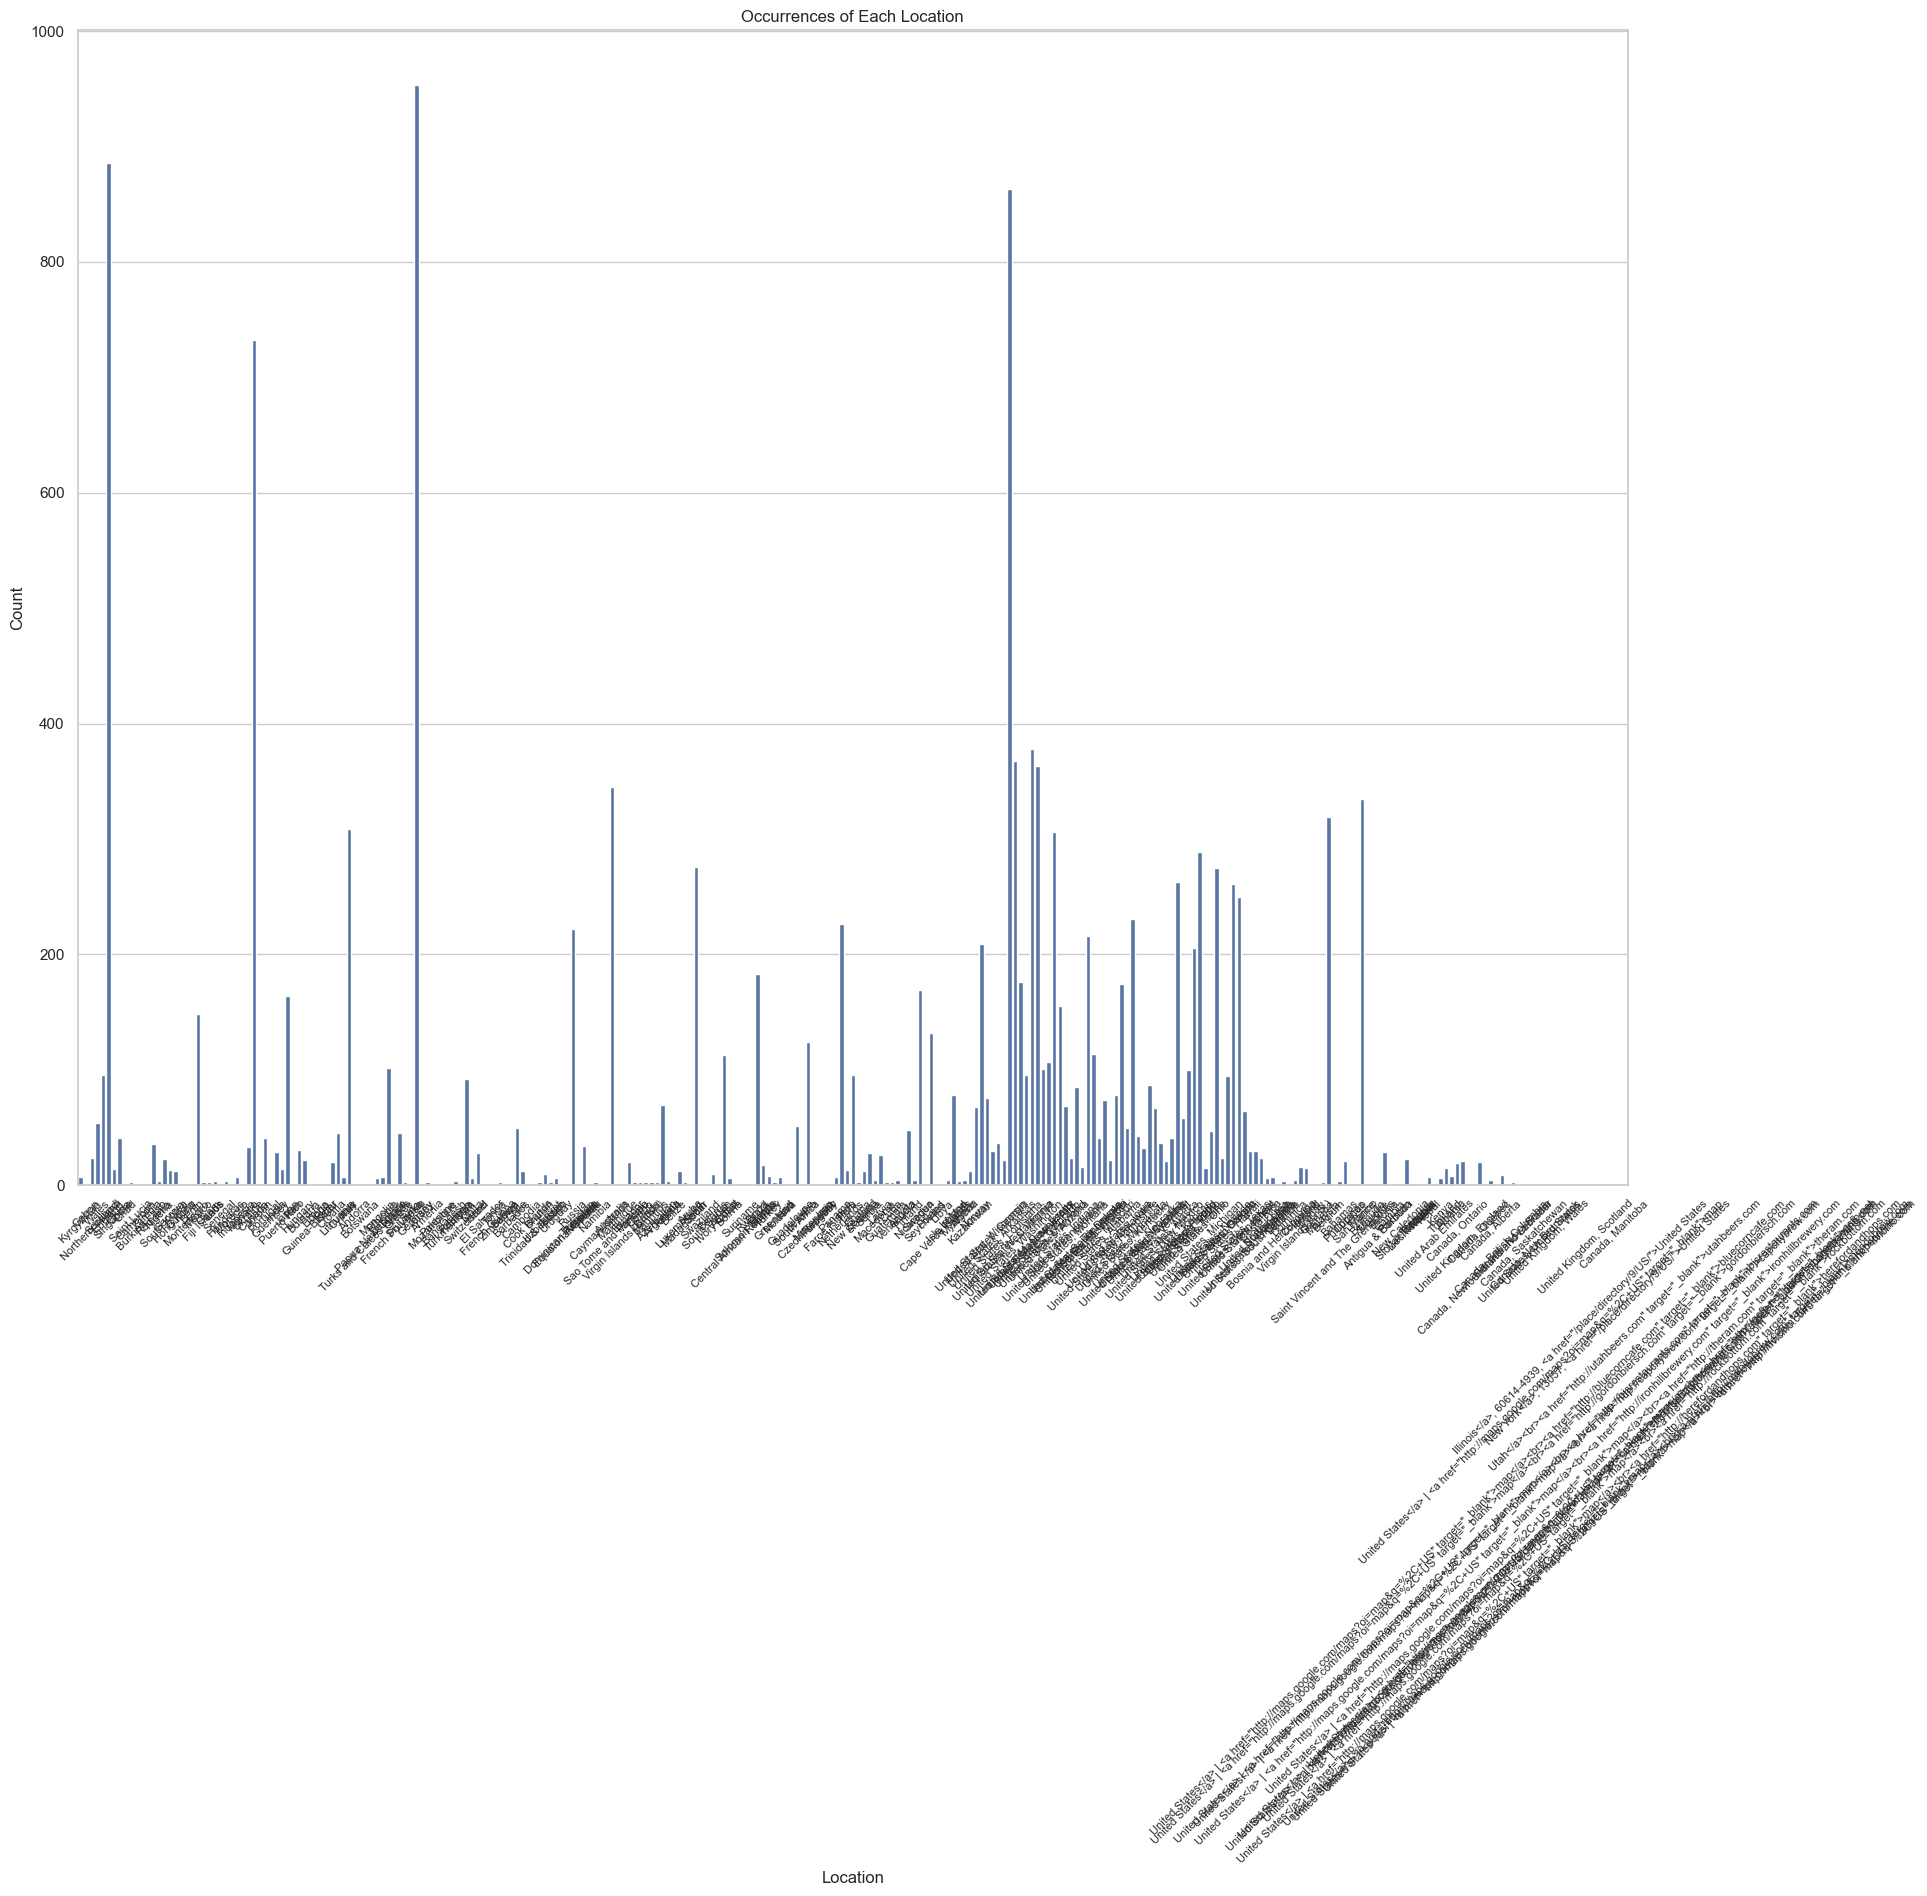

In [78]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Eliminate links added

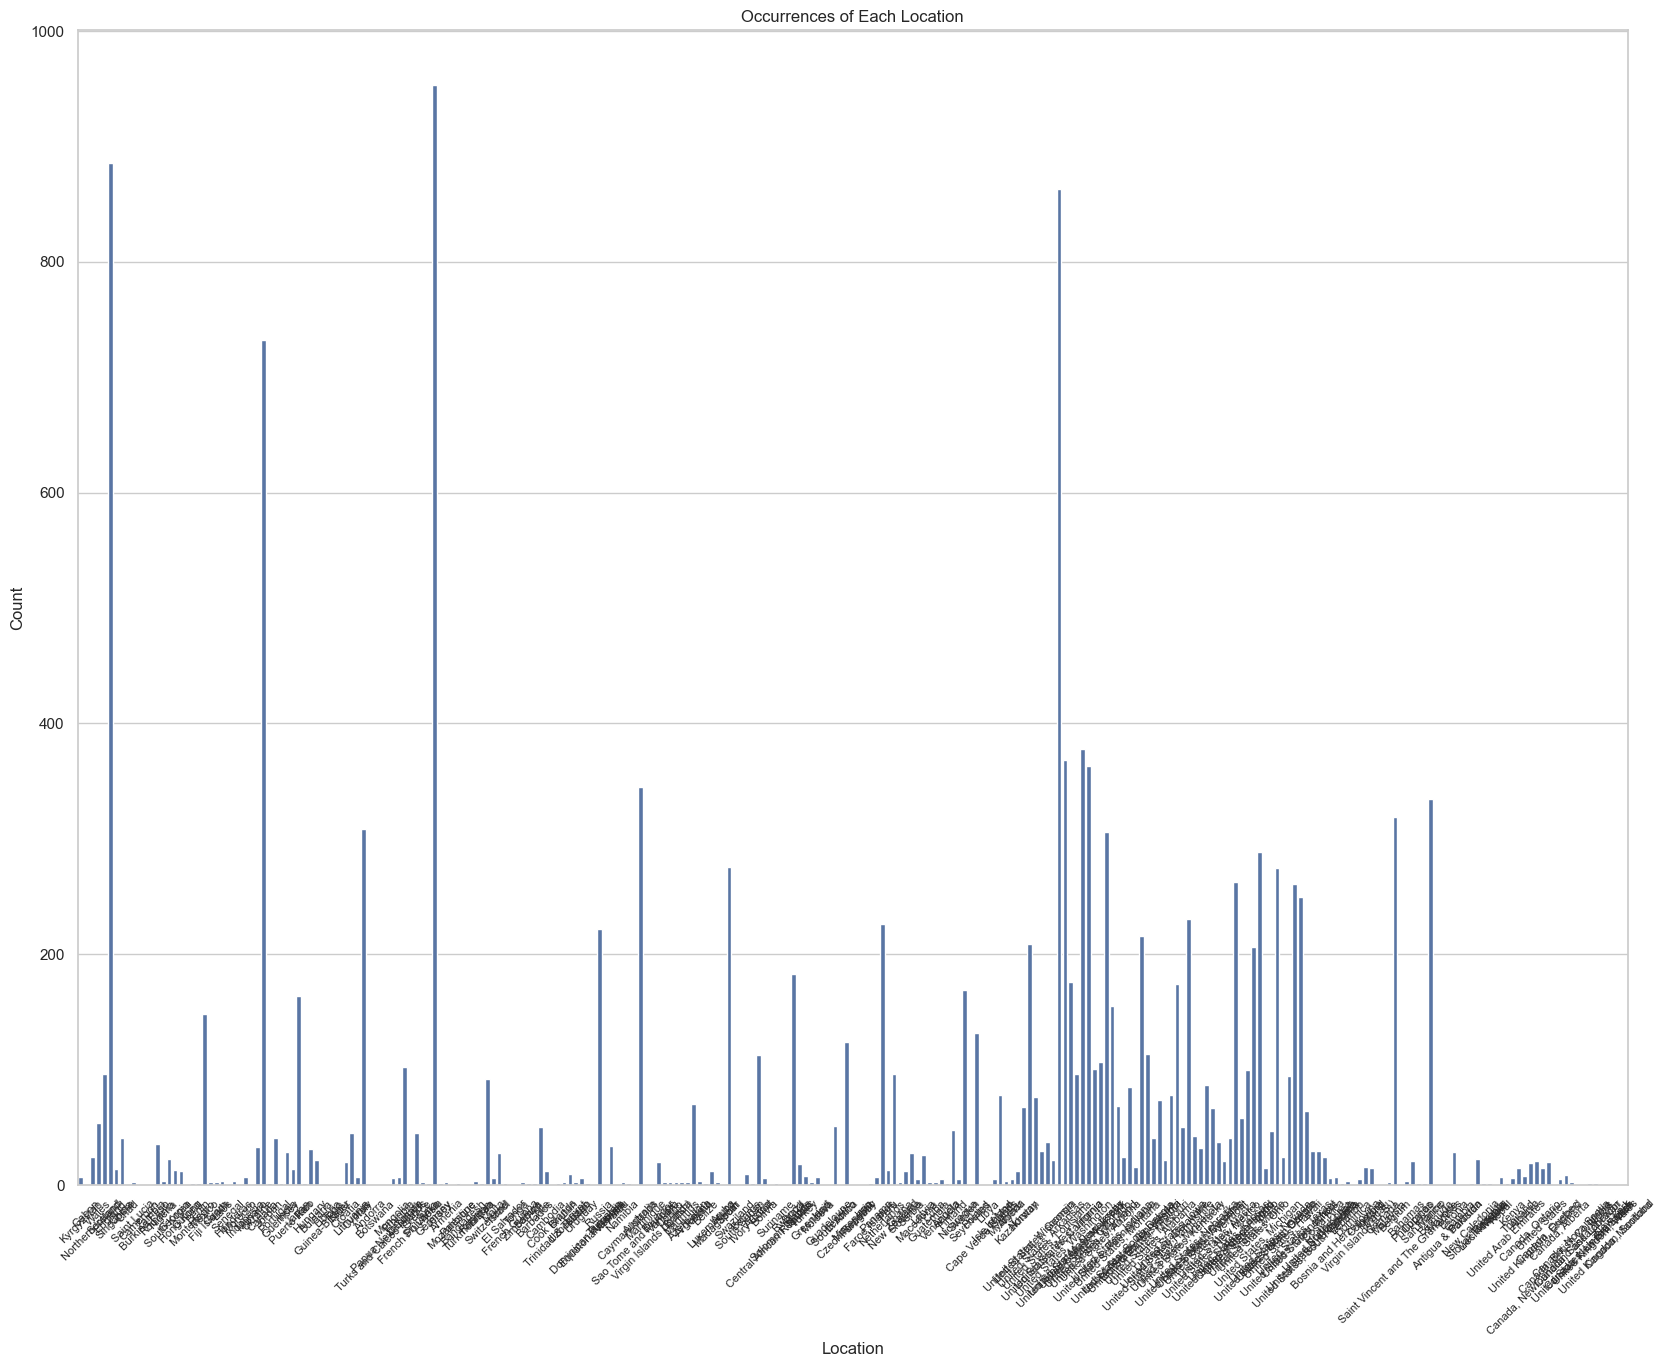

In [80]:
breweries_adv_filt['link'] = breweries_adv_filt['location'].str.contains("href", case=False, na=False)
breweries_adv_filt.loc[breweries_adv_filt['link'] == True, 'location'] = breweries_adv_filt['location'].str.split('<').str[0]
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt, x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Lets start by dividing the locations regions ",":

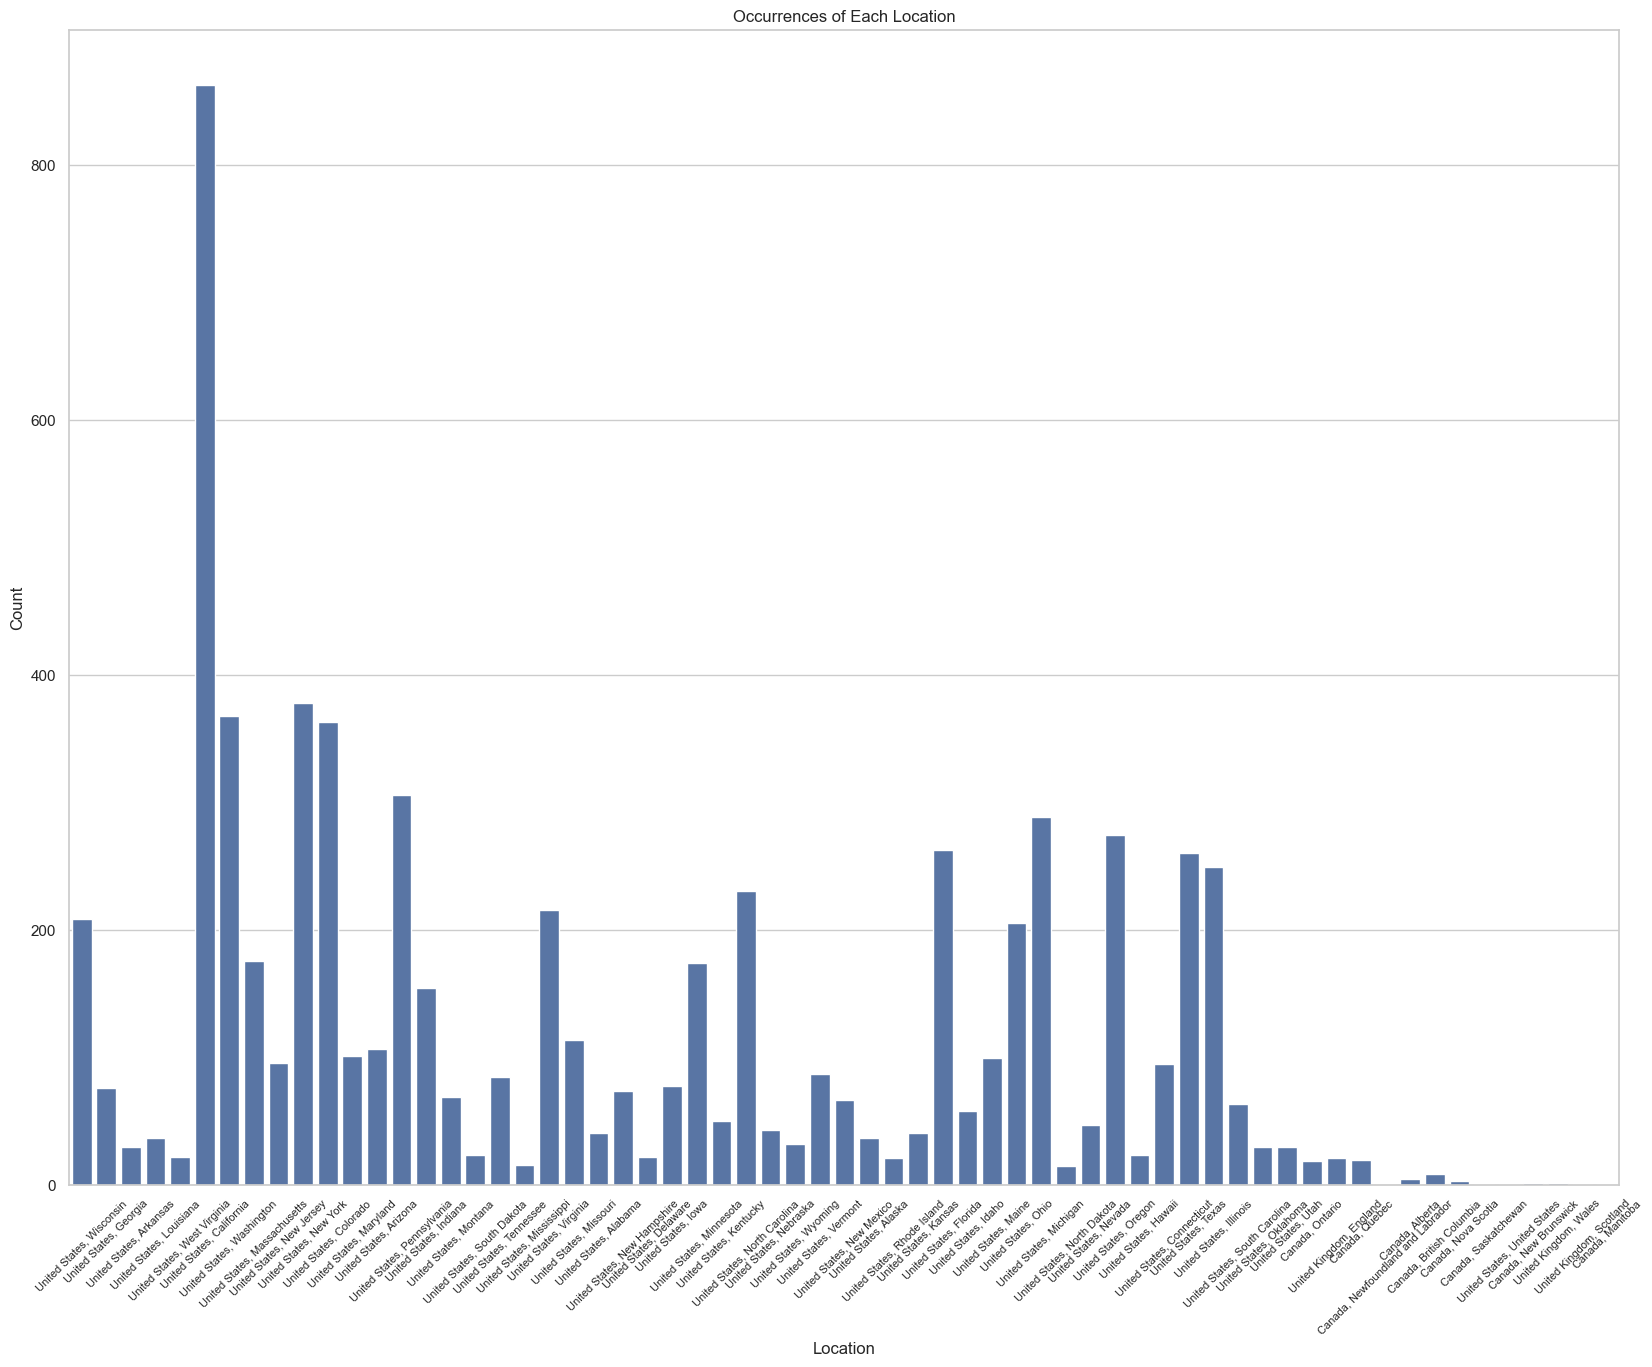

In [82]:
breweries_adv_filt['Regions'] = breweries_adv_filt['location'].str.contains(r"[,\|<]", case=False, na=False)

plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Regions'] == True], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

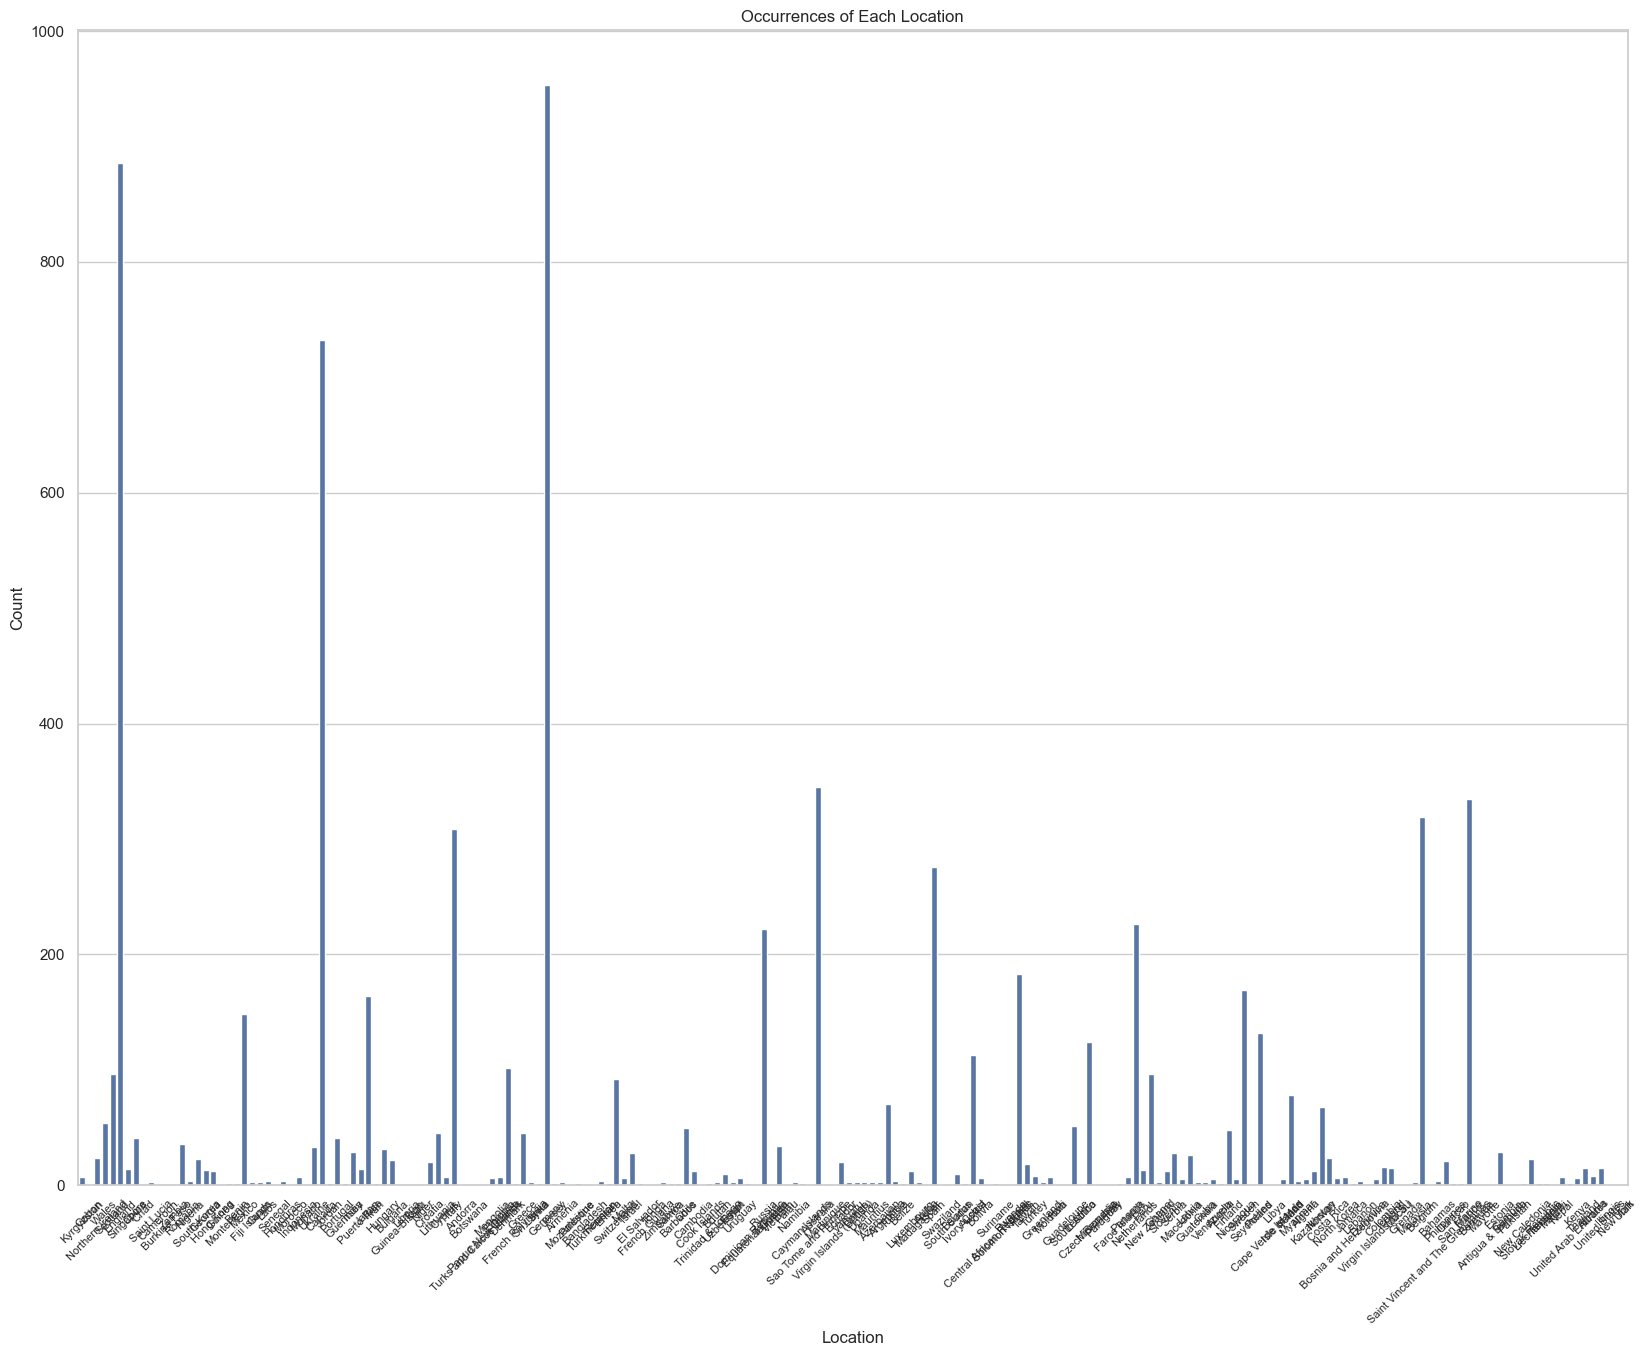

In [84]:
plt.figure(figsize=(20, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Regions'] == False], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=8) 
plt.show()

Lest divide US, Canada and UK into location and region:

In [86]:
breweries_adv_filt[['location', 'location_region']] = breweries_adv_filt['location'].str.split(',', n=1, expand=True)

breweries_adv_filt['location'] = breweries_adv_filt['location'].str.strip()
breweries_adv_filt['location_region'] = breweries_adv_filt['location_region'].str.strip()

breweries_adv_filt[breweries_adv_filt['Regions']].head()

id       location                          name  nbr_beers   link  \
7986  49595  United States  Copper State Brewing Company          7  False   
7987   5522  United States                    Corner Pub         13  False   
7988   4834  United States           Courthouse Pub, The         13  False   
7989    939  United States     Cross Plains Beer Company          3  False   
7990  21405  United States               Dave's BrewFarm         90  False   

      Regions location_region  
7986     True       Wisconsin  
7987     True       Wisconsin  
7988     True       Wisconsin  
7989     True       Wisconsin  
7990     True       Wisconsin

In [88]:
breweries_adv_filt['US'] = breweries_adv_filt['location'].str.contains("United States", case=False, na=False)
breweries_adv_filt['UK'] = breweries_adv_filt['location'].str.contains("United Kingdom", case=False, na=False)
breweries_adv_filt['Canada'] = breweries_adv_filt['location'].str.contains("Canada", case=False, na=False)

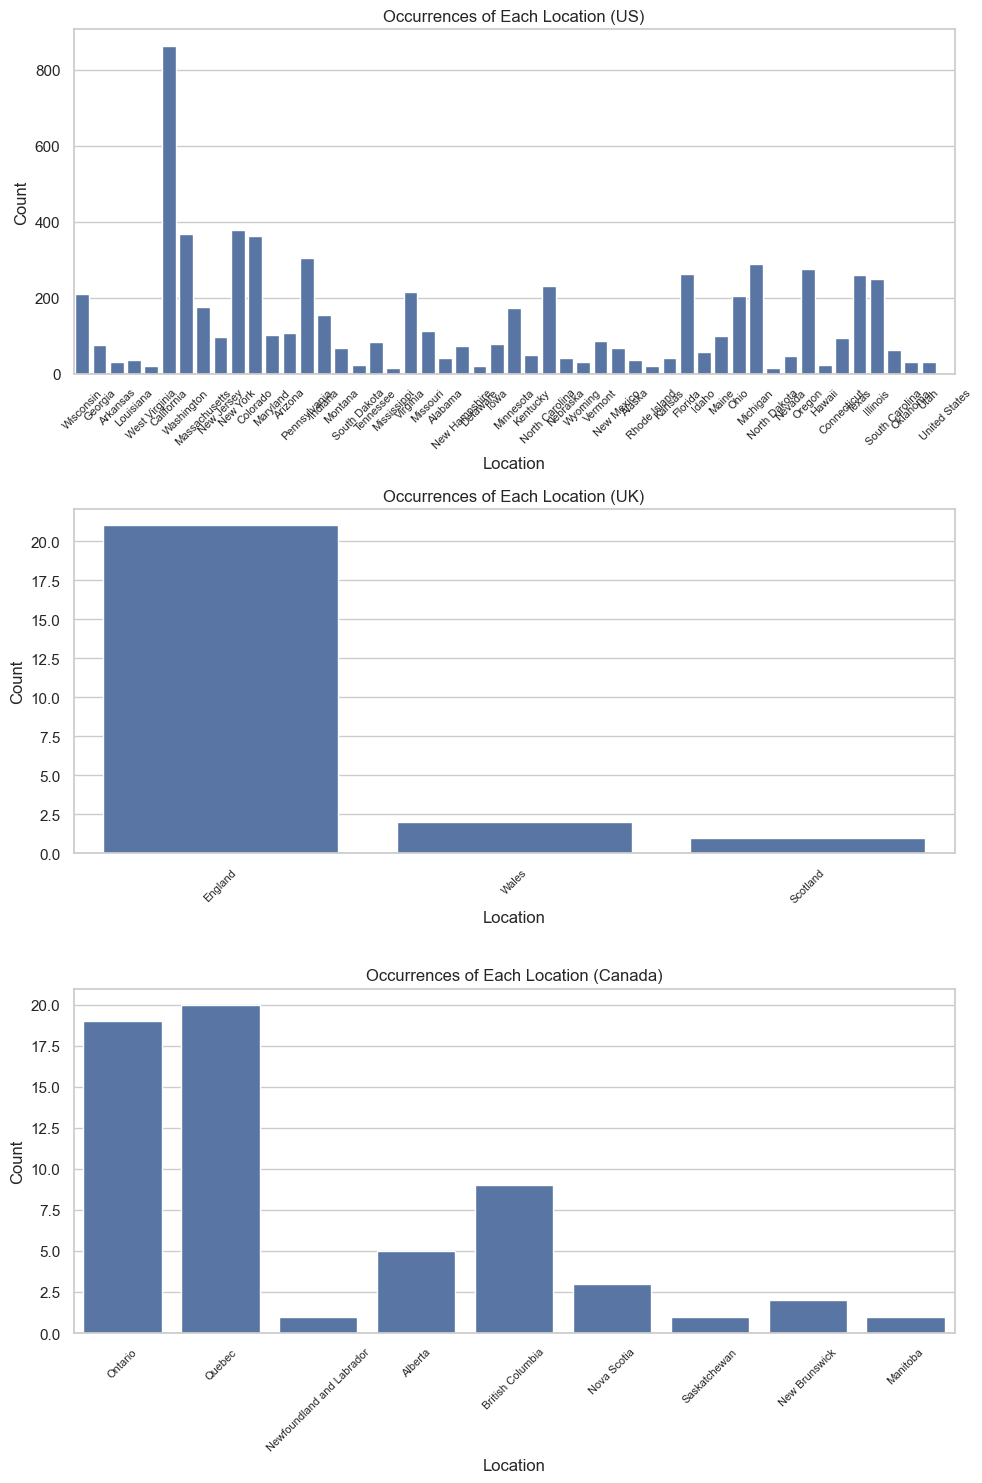

In [90]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(data=breweries_adv_filt[breweries_adv_filt['US'] == True], x='location_region', ax=axes[0])
axes[0].set_title('Occurrences of Each Location (US)')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=breweries_adv_filt[breweries_adv_filt['UK'] == True], x='location_region', ax=axes[1])
axes[1].set_title('Occurrences of Each Location (UK)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=breweries_adv_filt[breweries_adv_filt['Canada'] == True], x='location_region', ax=axes[2])
axes[2].set_title('Occurrences of Each Location (Canada)')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)

plt.tight_layout()
plt.show()


In [91]:
breweries_adv_filt.loc[breweries_adv_filt['location_region'] == "United States", 'location_region'] = np.nan

In [92]:
breweries_adv_filt = breweries_adv_filt.drop(columns=['link', 'Regions'], errors='ignore')
breweries_adv_filt.head()

id    location                    name  nbr_beers location_region  \
0  39912  Kyrgyzstan  Abdysh-Ata (Абдыш Ата)          5            None   
1  39913  Kyrgyzstan             Arpa (АРПА)          1            None   
2  39914  Kyrgyzstan               Bear Beer          4            None   
3  39915  Kyrgyzstan             Blonder Pub          4            None   
4  39916  Kyrgyzstan            Kellers Bier          2            None   

      US     UK  Canada  
0  False  False   False  
1  False  False   False  
2  False  False   False  
3  False  False   False  
4  False  False   False

Let's check for duplicates:

In [100]:
print(breweries_adv_filt['id'].duplicated().any())

duplicates = breweries_adv_filt['id'].duplicated()
duplicates.describe()

False


count     14522
unique        1
top       False
freq      14522
Name: id, dtype: object

Now we can merge the location column information to the beers dataset already processed:

In [103]:
breweries_adv_filt.rename(columns={'name': 'brewery_name'}, inplace=True)

beers_adv_filt_unique_location = beers_adv_filt_unique.merge(
    breweries_adv_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)

beers_adv_filt_unique_location.head()

beer_id           beer_name  brewery_id  \
0   142544               Régab       37262   
1    19590       Barelegs Brew       10093   
2    19827            Legbiter       10093   
3    20841   St. Patrick's Ale       10093   
4    20842  St. Patrick's Best       10093   

                                brewery_name             style  nbr_ratings  \
0  Societe des Brasseries du Gabon (SOBRAGA)   Euro Pale Lager            1   
1       Strangford Lough Brewing Company Ltd  English Pale Ale            4   
2       Strangford Lough Brewing Company Ltd  English Pale Ale           75   
3       Strangford Lough Brewing Company Ltd  English Pale Ale            8   
4       Strangford Lough Brewing Company Ltd    English Bitter           64   

   nbr_reviews   avg  ba_score  bros_score  abv  avg_computed    zscore  \
0            1  2.88       NaN         NaN  4.5      2.880000       NaN   
1            4  3.85       NaN         NaN  4.5      3.845000       NaN   
2           59  3.45      80.0        80.0  4.8      3.439867 -0.649167   
3            6  3.86       NaN         NaN  6.0      3.888750  0.093110   
4           48  3.56      82.0        90.0  4.2      3.556094 -0.478579   

   nbr_matched_valid_ratings  avg_matched_valid_ratings          location  \
0                          0                        NaN             Gabon   
1                          0                        NaN  Northern Ireland   
2                         59                   3.504068  Northern Ireland   
3                          6                   3.768333  Northern Ireland   
4                         48                   3.580417  Northern Ireland   

  location_region     US     UK  Canada  
0            None  False  False   False  
1            None  False  False   False  
2            None  False  False   False  
3            None  False  False   False  
4            None  False  False   False

### Users

In [106]:
users_adv = pd.read_csv("data/birre/BeerAdvocate/users.csv", sep=",")

In [108]:
utils.dataset_information(users_adv, "Users_BA")



########################################################
We are starting analysing dataset Users_BA
- Dimension of starting dataset: (153704, 6)
- Columns of dataset:  Index(['nbr_ratings', 'nbr_reviews', 'user_id', 'user_name', 'joined',
       'location'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
    nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ire

We need to deal with `joined` and `location`:

* `joined`: usage of datetime functions of `pandas` to transform the seconds into proper date structure.
* `location`: same approach as breweries and beers datasets. Division into `location`, `location_region` and booleans for quick identification of US, UK and Canada cases. 

In [111]:
users_adv.head()

nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

         joined                   location  
0  1.199704e+09  United States, Washington  
1  1.191838e+09    United States, New York  
2  1.116410e+09           Northern Ireland  
3  1.101380e+09           Northern Ireland  
4  1.069326e+09           Northern Ireland

In [168]:
users_adv['joined'] = pd.to_datetime(users_adv['joined'], unit='s')
users_adv[['location', 'location_region']] = users_adv['location'].str.split(',', n=1, expand=True)




users_adv['US'] = users_adv['location'].str.contains("United States", case=False, na=False)
users_adv['UK'] = users_adv['location'].str.contains(pattern, case=False, na=False)
users_adv['Canada'] = users_adv['location'].str.contains("Canada", case=False, na=False)
users_adv.loc[users_adv['location_region'] == "United States", 'location_region'] = np.nan
users_adv=utils.update_location_and_region(users_adv)

users_adv.head()
	
duplicated_users_id_rows = users_adv[users_adv['user_id'].duplicated(keep=False)]
duplicated_users_id_rows.head()

ValueError: Columns must be same length as key

In [170]:
users_adv_unique= users_adv.drop_duplicates(subset='user_id', keep='first').reset_index(drop=True)
users_adv_unique.head()

nbr_ratings  nbr_reviews                user_id        user_name  \
0         7820          465         nmann08.184925          nmann08   
1         2521         2504     stjamesgate.163714      StJamesGate   
2         1797         1143          mdagnew.19527          mdagnew   
3           31           31  helloloser12345.10867  helloloser12345   
4          604          604        cypressbob.3708       cypressbob   

               joined          location  location_region     US     UK  Canada  
0 2008-01-07 11:00:00     United States              NaN   True  False   False  
1 2007-10-08 10:00:00     United States              NaN   True  False   False  
2 2005-05-18 10:00:00  Northern Ireland              NaN  False   True   False  
3 2004-11-25 11:00:00  Northern Ireland              NaN  False   True   False  
4 2003-11-20 11:00:00  Northern Ireland              NaN  False   True   False

In [ ]:
fig, axes = plt.subplots(3, 1, figsize=(10, 15))
sns.countplot(data=users_adv[users_adv['US'] == True], x='location_region', ax=axes[0])
axes[0].set_title('Occurrences of Each Location (US)')
axes[0].set_xlabel('Location')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

sns.countplot(data=users_adv[users_adv['UK'] == True], x='location_region', ax=axes[1])
axes[1].set_title('Occurrences of Each Location (UK)')
axes[1].set_xlabel('Location')
axes[1].set_ylabel('Count')
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

"""
No regions in canada
sns.countplot(data=users_adv[users_adv['Canada'] == True], x='location_region', ax=axes[2])
axes[2].set_title('Occurrences of Each Location (Canada)')
axes[2].set_xlabel('Location')
axes[2].set_ylabel('Count')
axes[2].tick_params(axis='x', rotation=45, labelsize=8)
"""

plt.tight_layout()
plt.show()

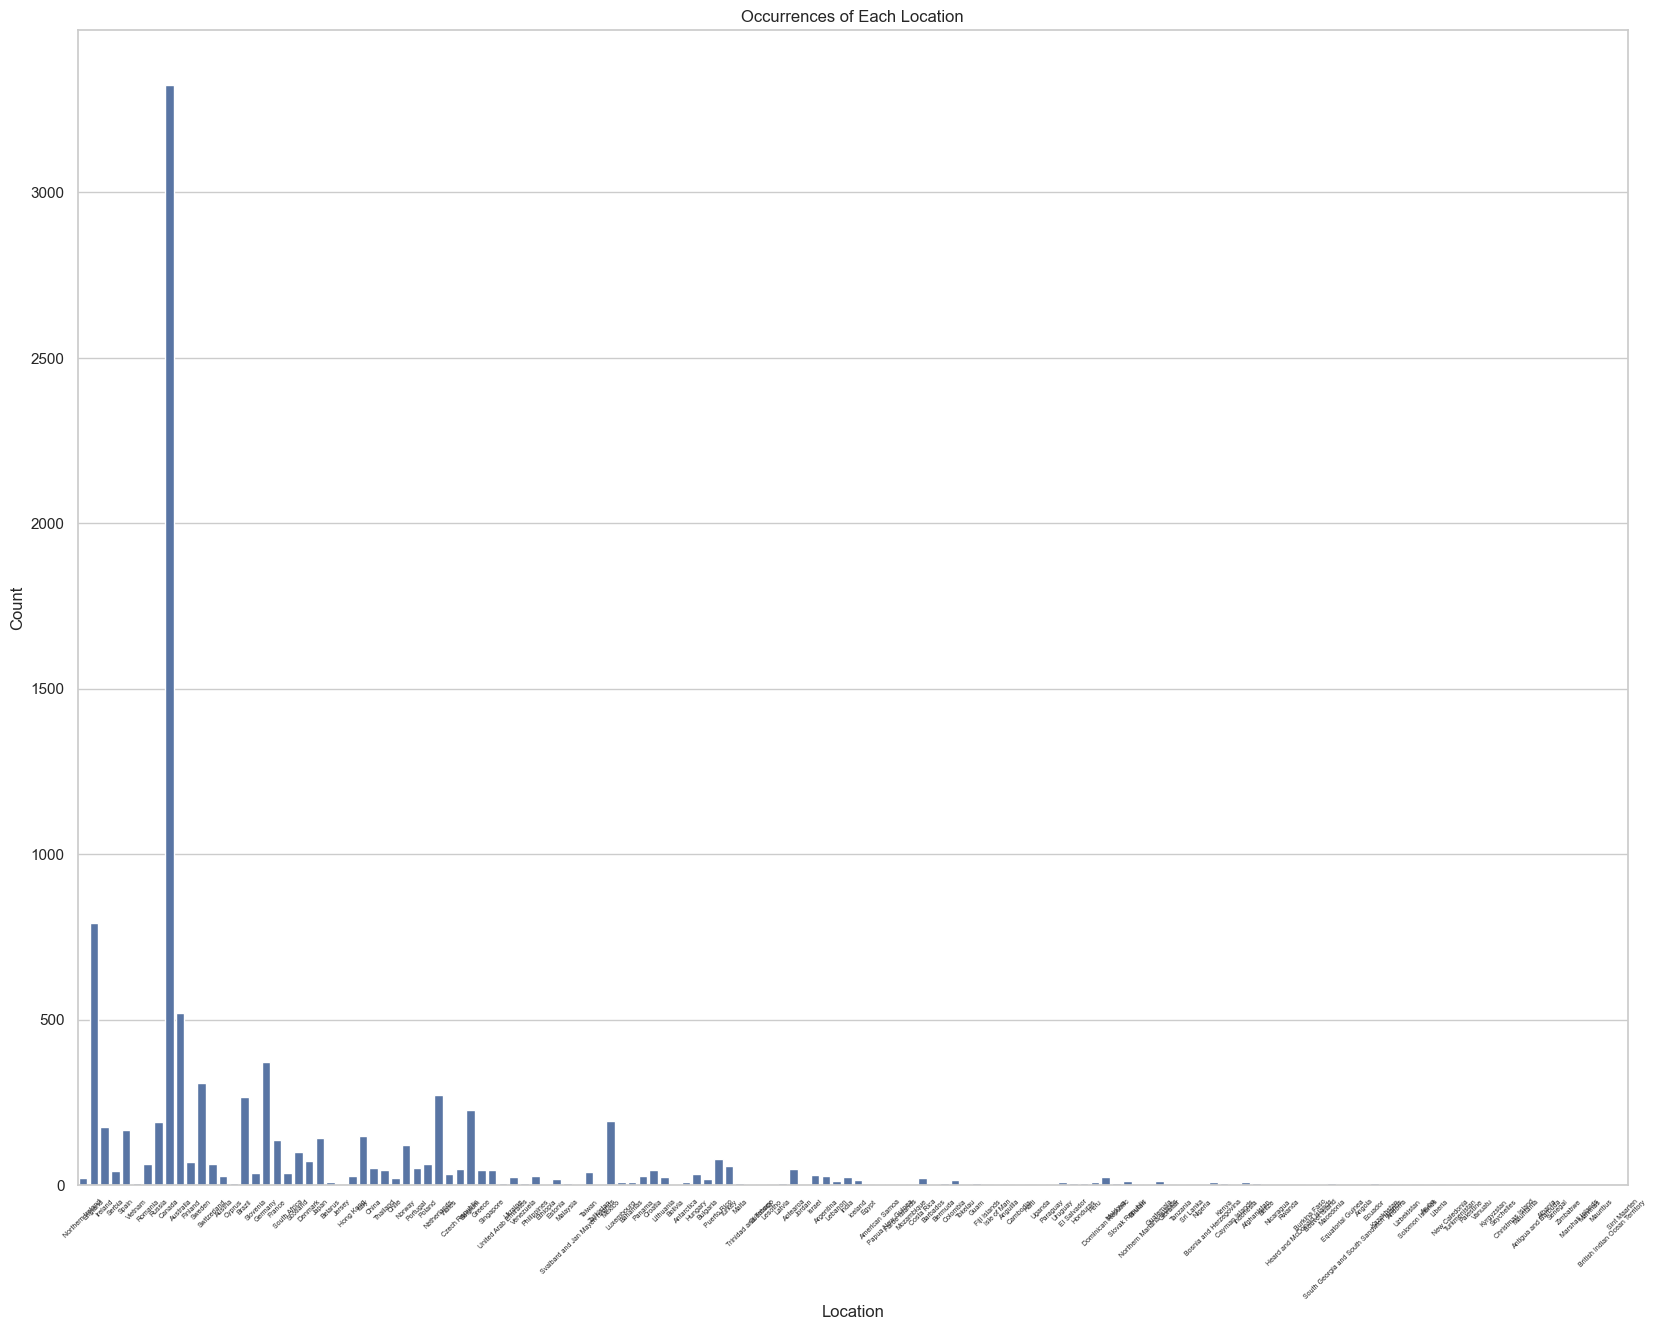

In [116]:
plt.figure(figsize=(20, 15))
sns.countplot(data=users_adv[users_adv['US'] == False], x='location')
plt.title('Occurrences of Each Location')
plt.xlabel('Location')
plt.ylabel('Count')
plt.xticks(rotation=45, fontsize=5) 
plt.show()


### Ratings

In [119]:
rating_BA=pd.read_csv('data/birre/BeerAdvocate/ratings_cleaned.csv')
utils.dataset_information(rating_BA, "Ratings RateBeer")



########################################################
We are starting analysing dataset Ratings RateBeer
- Dimension of starting dataset: (2630468, 17)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv       

In [144]:
rating_BA_cleaned = rating_BA.dropna(subset=['rating', 'date'])

rating_BA_cleaned = rating_BA.drop_duplicates(subset=['beer_name','date', 'user_name'])

rating_BA_cleaned.head()

beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  1440064800          nmann08   
1       10093  English Pale Ale  4.5  1235127600      StJamesGate   
2       10093  English Pale Ale  4.5  1142247600          mdagnew   
3       10093  English Pale Ale  4.5  1101898800  helloloser12345   
4       10093  English Pale Ale  4.5  1093860000       cypressbob   

                 user_id  appearance  aroma  palate  taste  overall  rating  \
0         nmann08.184925        3.25   2.75    3.25   2.75      3.0    2.88   
1     stjamesgate.163714        3.00   3.50    3.50   4.00      3.5    3.67   
2          mdagnew.19527        4.00   3.50    3.50   4.00      3.5    3.73   
3  helloloser12345.10867        4.00   3.50    4.00   4.00      4.5    3.98   
4        cypressbob.3708        4.00   4.00    4.00   4.00      4.0    4.00   

                                                text  review  
0  From a bottle, pours a piss yellow color with ...    True  
1  Pours pale copper with a thin head that quickl...    True  
2  500ml Bottle bought from The Vintage, Antrim.....    True  
3  Serving: 500ml brown bottlePour: Good head wit...    True  
4  500ml bottlePours with a light, slightly hazy ...    True

In [174]:
ratings_adv_locations = rating_BA_cleaned.merge(
    breweries_adv_filt[['brewery_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='brewery_name',
    how='left'
)

ratings_adv_locations.head()

beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  1440064800          nmann08   
1       10093  English Pale Ale  4.5  1235127600      StJamesGate   
2       10093  English Pale Ale  4.5  1142247600          mdagnew   
3       10093  English Pale Ale  4.5  1101898800  helloloser12345   
4       10093  English Pale Ale  4.5  1093860000       cypressbob   

                 user_id  appearance  ...  taste  overall  rating  \
0         nmann08.184925        3.25  ...   2.75      3.0    2.88   
1     stjamesgate.163714        3.00  ...   4.00      3.5    3.67   
2          mdagnew.19527        4.00  ...   4.00      3.5    3.73   
3  helloloser12345.10867        4.00  ...   4.00      4.5    3.98   
4        cypressbob.3708        4.00  ...   4.00      4.0    4.00   

                                                text  review  \
0  From a bottle, pours a piss yellow color with ...    True   
1  Pours pale copper with a thin head that quickl...    True   
2  500ml Bottle bought from The Vintage, Antrim.....    True   
3  Serving: 500ml brown bottlePour: Good head wit...    True   
4  500ml bottlePours with a light, slightly hazy ...    True   

           location  location_region     US     UK  Canada  
0             Gabon             None  False  False   False  
1  Northern Ireland             None  False  False   False  
2  Northern Ireland             None  False  False   False  
3  Northern Ireland             None  False  False   False  
4  Northern Ireland             None  False  False   False  

[5 rows x 22 columns]

In [178]:

columns_rename = {
    'location': 'location_beer',
    'location_region': 'location_region_beer',
    'US': 'US_beer',
    'UK': 'UK_beer',
    'Canada': 'Canada_beer'
}
ratings_adv_locations = ratings_adv_locations.rename(columns=columns_rename)

In [182]:
ratings_adv_locations_complete = ratings_adv_locations.merge(
    users_adv_unique[['user_name', 'location', 'location_region', 'US', 'UK', 'Canada']],
    on='user_name',
    how='left'
)

columns_rename = {
    'location': 'location_user',
    'location_region': 'location_region_user',
    'US': 'US_user',
    'UK': 'UK_user',
    'Canada': 'Canada_user'
}
ratings_adv_locations_complete = ratings_adv_locations_complete.rename(columns=columns_rename)
ratings_adv_locations_complete.head()

beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv        date        user_name  \
0       37262   Euro Pale Lager  4.5  1440064800          nmann08   
1       10093  English Pale Ale  4.5  1235127600      StJamesGate   
2       10093  English Pale Ale  4.5  1142247600          mdagnew   
3       10093  English Pale Ale  4.5  1101898800  helloloser12345   
4       10093  English Pale Ale  4.5  1093860000       cypressbob   

                 user_id  appearance  ...     location_beer  \
0         nmann08.184925        3.25  ...             Gabon   
1     stjamesgate.163714        3.00  ...  Northern Ireland   
2          mdagnew.19527        4.00  ...  Northern Ireland   
3  helloloser12345.10867        4.00  ...  Northern Ireland   
4        cypressbob.3708        4.00  ...  Northern Ireland   

   location_region_beer  US_beer  UK_beer  Canada_beer     location_user  \
0                  None    False    False        False     United States   
1                  None    False    False        False     United States   
2                  None    False    False        False  Northern Ireland   
3                  None    False    False        False  Northern Ireland   
4                  None    False    False        False  Northern Ireland   

   location_region_user US_user UK_user  Canada_user  
0                   NaN    True   False        False  
1                   NaN    True   False        False  
2                   NaN   False    True        False  
3                   NaN   False    True        False  
4                   NaN   False    True        False  

[5 rows x 27 columns]

In [184]:
ratings_adv_locations_complete['date'] = pd.to_datetime(ratings_adv_locations_complete['date'], unit='s')
ratings_adv_locations_complete.head()

beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
4  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   

   brewery_id             style  abv                date        user_name  \
0       37262   Euro Pale Lager  4.5 2015-08-20 10:00:00          nmann08   
1       10093  English Pale Ale  4.5 2009-02-20 11:00:00      StJamesGate   
2       10093  English Pale Ale  4.5 2006-03-13 11:00:00          mdagnew   
3       10093  English Pale Ale  4.5 2004-12-01 11:00:00  helloloser12345   
4       10093  English Pale Ale  4.5 2004-08-30 10:00:00       cypressbob   

                 user_id  appearance  ...     location_beer  \
0         nmann08.184925        3.25  ...             Gabon   
1     stjamesgate.163714        3.00  ...  Northern Ireland   
2          mdagnew.19527        4.00  ...  Northern Ireland   
3  helloloser12345.10867        4.00  ...  Northern Ireland   
4        cypressbob.3708        4.00  ...  Northern Ireland   

   location_region_beer  US_beer  UK_beer  Canada_beer     location_user  \
0                  None    False    False        False     United States   
1                  None    False    False        False     United States   
2                  None    False    False        False  Northern Ireland   
3                  None    False    False        False  Northern Ireland   
4                  None    False    False        False  Northern Ireland   

   location_region_user US_user UK_user  Canada_user  
0                   NaN    True   False        False  
1                   NaN    True   False        False  
2                   NaN   False    True        False  
3                   NaN   False    True        False  
4                   NaN   False    True        False  

[5 rows x 27 columns]

In [186]:
ratings_adv_locations_complete_filt = ratings_adv_locations_complete.dropna(subset=['beer_id', 'user_id'])
utils.dataset_information(ratings_adv_locations_complete_filt, "Ratings filtered")



########################################################
We are starting analysing dataset Ratings filtered
- Dimension of starting dataset: (2930999, 27)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs

In [190]:
utils.ensure_col_types2(ratings_adv_locations_complete_filt, ['beer_id','brewery_id','user_id'],['abv'],['beer_name','brewery_name','style','user_name'])

AttributeError: module 'utils' has no attribute 'ensure_col_types2'

In [192]:
missing_beers = ratings_adv_locations_complete[~ratings_adv_locations_complete['beer_id'].isin(beers_adv_filt_unique_location['beer_id'])]

if missing_beers.empty:
    print("All 'beers_id' in the ratings dataset are present in the beers_adv dataset.")
else:
    print(f"The following 'beers_id' are missing in beers_adv:\n{missing_beers['beer_id'].unique()}")


The following 'beers_id' are missing in beers_adv:
[153718 178689 247044 ... 227098 138306 261598]


In [196]:
ratings_adv_locations_complete_filt = ratings_adv_locations_complete_filt[
    ratings_adv_locations_complete_filt['beer_id'].isin(beers_adv_filt_unique_location['beer_id']) & ratings_adv_locations_complete_filt['user_name'].isin(users_adv_unique['user_name'])
]
utils.dataset_information(ratings_adv_locations_complete_filt, "Missing beers")



########################################################
We are starting analysing dataset Missing beers
- Dimension of starting dataset: (2873793, 27)
- Columns of dataset:  Index(['beer_name', 'beer_id', 'brewery_name', 'brewery_id', 'style', 'abv',
       'date', 'user_name', 'user_id', 'appearance', 'aroma', 'palate',
       'taste', 'overall', 'rating', 'text', 'review', 'location_beer',
       'location_region_beer', 'US_beer', 'UK_beer', 'Canada_beer',
       'location_user', 'location_region_user', 'US_user', 'UK_user',
       'Canada_user'],
      dtype='object')
- Are all the id unique? Answer: False
- Are there some values that are NaN inside the dataset? Answer: True
Head: 
        beer_name  beer_id                               brewery_name  \
0          Régab   142544  Societe des Brasseries du Gabon (SOBRAGA)   
1  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
2  Barelegs Brew    19590       Strangford Lough Brewing Company Ltd   
3  Barelegs Br

## Processed savings

In [398]:
confirmation = input("Do you want to save the processed files? Type 'yes' to confirm: ").strip().lower()

if confirmation == 'yes':
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'beers_processed.csv', beers_rate_filt_unique_location)
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'breweries_processed.csv', breweries_rate_filt)
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'users_processed.csv', users_rate_unique)
    utils.write_csv_into_directory('../../data/Processed/RateBeer', 'ratings_processed.csv', ratings_rate_locations_complete_filt)
    print("Files saved successfully!")
else:
    print("Operation canceled. No files were saved.")

Dataset successfully saved to data/BeerAdvocate/beers_processed.csv
Dataset successfully saved to data/BeerAdvocate/breweries_processed.csv
Dataset successfully saved to data/BeerAdvocate/users_processed.csv


## task 3

In [121]:
reviews_df=pd.read_csv(data/Processed/RateBeer')

user_id  nbr_ratings_user  nbr_reviews_user              joined  \
0  nmann08.184925              7820               465 2008-01-07 11:00:00   
1  nmann08.184925              7820               465 2008-01-07 11:00:00   
2  nmann08.184925              7820               465 2008-01-07 11:00:00   
3  nmann08.184925              7820               465 2008-01-07 11:00:00   
4  nmann08.184925              7820               465 2008-01-07 11:00:00   

   location_user location_region_user  US_user  UK_user  Canada_user  \
0  United States           Washington     True    False        False   
1  United States           Washington     True    False        False   
2  United States           Washington     True    False        False   
3  United States           Washington     True    False        False   
4  United States           Washington     True    False        False   

    beer_id  ...   abv avg_computed    zscore  nbr_matched_valid_ratings  \
0  142544.0  ...   4.5     2.880000       NaN                        0.0   
1  120824.0  ...   5.0     3.837500 -0.163207                        2.0   
2   47581.0  ...   8.0     4.184639       NaN                        0.0   
3   93113.0  ...  10.5     4.113676       NaN                        0.0   
4     875.0  ...   6.0     4.135737       NaN                        0.0   

   avg_matched_valid_ratings  location_breweries  location_region_breweries  \
0                        NaN               Gabon                       None   
1                      4.145               Wales                       None   
2                        NaN            Scotland                       None   
3                        NaN            Scotland                       None   
4                        NaN            Scotland                       None   

   US_breweries UK_breweries Canada_breweries  
0         False        False            False  
1         False        False            False  
2         False        False            False  
3         False        False            False  
4         False        False            False  

[5 rows x 39 columns]

In [125]:

# Step 1: Count reviews per group and filter based on threshold
review_counts = reviews_df.groupby(['beer_id', 'year', 'location_user']).size().reset_index(name='review_count')

# Step 2: Merge back to the main DataFrame and filter for groups with at least 5 reviews
reviews_with_counts = pd.merge(reviews_df, review_counts, on=['beer_id', 'year', 'location_user'])
filtered_reviews = reviews_with_counts[reviews_with_counts['review_count'] >= 5]

# Step 3: Calculate weighted average rating for each group
weighted_avg_ratings = filtered_reviews.groupby(['beer_id', 'beer_name', 'year', 'review_count','location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_ratings['rank'] = (
    weighted_avg_ratings.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

# Check results
weighted_avg_ratings.head()


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_30173/66391315.py:25: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings = filtered_reviews.groupby(['beer_id', 'beer_name', 'year', 'review_count','location_user']).apply(


beer_id beer_name    year  review_count  location_user  \
0      5.0     Amber  2002.0            20  United States   
1      5.0     Amber  2003.0            21  United States   
2      5.0     Amber  2004.0            30  United States   
3      5.0     Amber  2005.0            32  United States   
4      5.0     Amber  2006.0            39  United States   

   weighted_avg_rating  rank  
0             3.423500   334  
1             3.378571   616  
2             3.398667   714  
3             3.421875   799  
4             3.267436  1048

In [126]:
# Pivot data for heatmap
top_ranked_beers = weighted_avg_ratings[weighted_avg_ratings['rank'] == 1]

pivot_data =top_ranked_beers.pivot_table(
    values='weighted_avg_rating', 
    index='year', 
    columns='location_user', 
    aggfunc='mean'
)





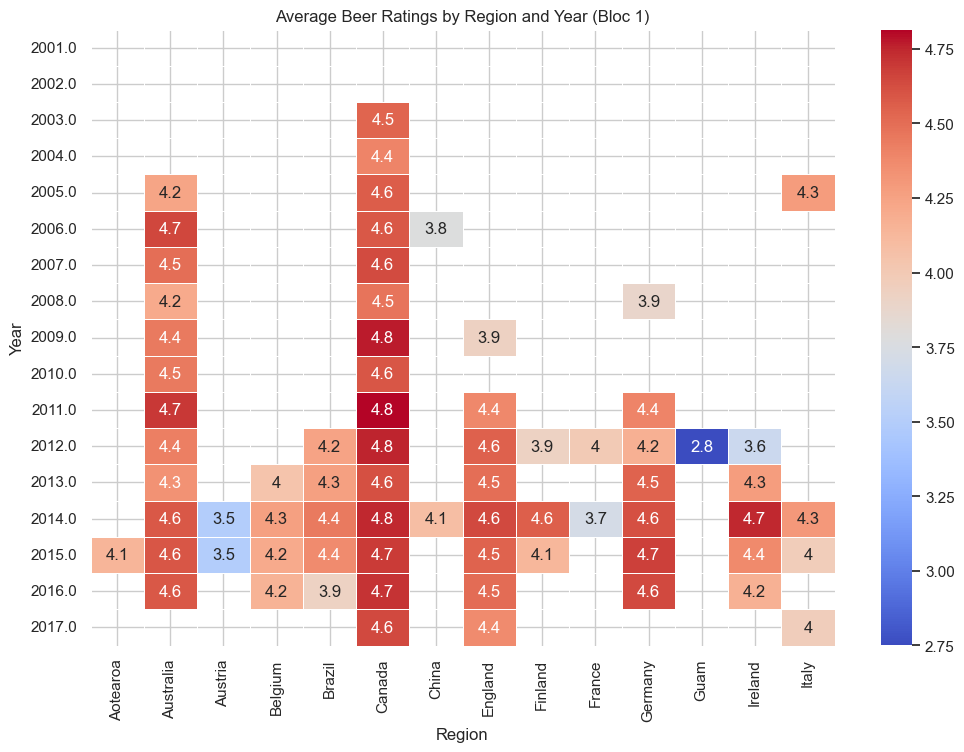

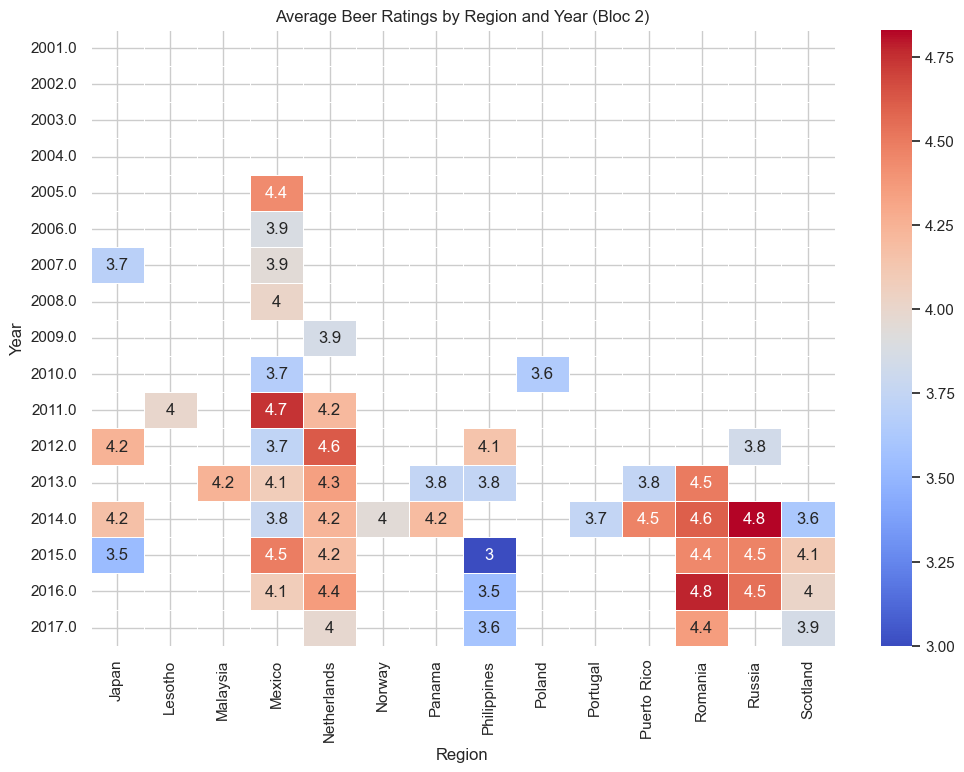

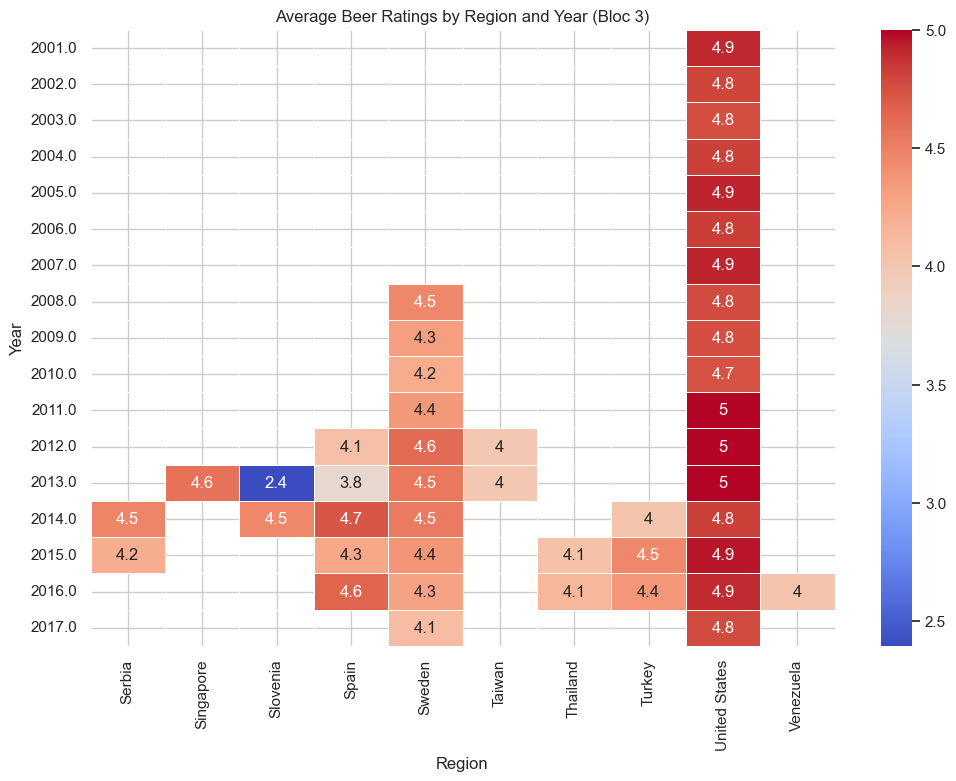

In [127]:

chunk_size = 14


num_chunks = len(pivot_data.columns) // chunk_size + (1 if len(pivot_data.columns) % chunk_size != 0 else 0)

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data.iloc[:, start:end]  # Seleziona le colonne del blocco
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(chunk, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Average Beer Ratings by Region and Year (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.show()


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/4207270338.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_beers_2017_us, x='beer_name', y='weighted_avg_rating', palette='viridis')


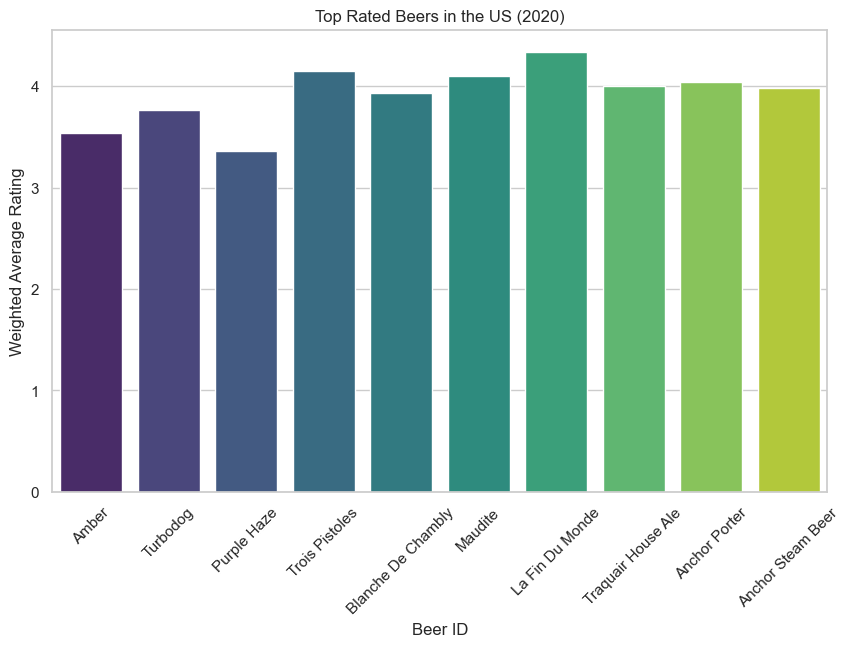

<bound method NDFrame.head of      beer_id           beer_name    year  review_count  location_user  \
15       5.0               Amber  2017.0            39  United States   
32       6.0            Turbodog  2017.0            36  United States   
50       7.0         Purple Haze  2017.0            68  United States   
140     30.0      Trois Pistoles  2017.0            51  United States   
171     31.0  Blanche De Chambly  2017.0            42  United States   
223     33.0             Maudite  2017.0            49  United States   
255     34.0     La Fin Du Monde  2017.0           109  United States   
275     36.0  Traquair House Ale  2017.0            26  United States   
320     61.0       Anchor Porter  2017.0            41  United States   
364     63.0   Anchor Steam Beer  2017.0            90  United States   

     weighted_avg_rating  rank  
15              3.534615  2440  
32              3.763056  2026  
50              3.357794  2570  
140             4.152745   709  
1

In [541]:

review_counts_us = reviews_df.groupby(['beer_id', 'year', 'location_region_user']).size().reset_index(name='review_count')


reviews_with_counts_us = pd.merge(reviews_df, review_counts_us, on=['beer_id', 'year', 'location_region_user'])
filtered_reviews_us = reviews_with_counts_us[reviews_with_counts_us['review_count'] >= 5]

weighted_avg_ratings_us = filtered_reviews_us.groupby(['beer_id', 'beer_name', 'year','review_count', 'location_region_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


weighted_avg_ratings_us['rank'] = (
    weighted_avg_ratings_us.sort_values(['year', 'location_region_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_region_user'])
    .cumcount() + 1
)



/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/2280733548.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings_us = filtered_reviews_us.groupby(['beer_id', 'beer_name', 'year','review_count', 'location_region_user']).apply(


In [559]:
# Pivot data for heatmap
top_ranked_beers_us = weighted_avg_ratings_us[weighted_avg_ratings_us['rank'] == 1]

pivot_data_us= top_ranked_beers_us.pivot_table(
    values='weighted_avg_rating', 
    index='year', 
    columns='location_region_user', 
    aggfunc='mean'
)
print(pivot_data_us)



location_region_user   Alabama    Alaska   Arizona  Arkansas  California  \
year                                                                       
2001.0                     NaN       NaN       NaN       NaN    4.393333   
2002.0                     NaN       NaN  4.060000       NaN    4.738000   
2003.0                     NaN       NaN  4.580000       NaN    4.720000   
2004.0                     NaN  4.500000  4.420000       NaN    4.712000   
2005.0                     NaN       NaN  4.200000  4.220000    4.758000   
2006.0                4.450000       NaN  4.641667  4.550000    4.850000   
2007.0                     NaN       NaN  4.325714  4.530000    4.791667   
2008.0                4.534000  3.500000  4.410000  4.560000    4.740000   
2009.0                4.133333  4.120000  4.526000  4.050000    4.920000   
2010.0                4.500000       NaN  4.612857       NaN    4.745000   
2011.0                4.720000       NaN  4.824375  3.933333    5.000000   
2012.0      

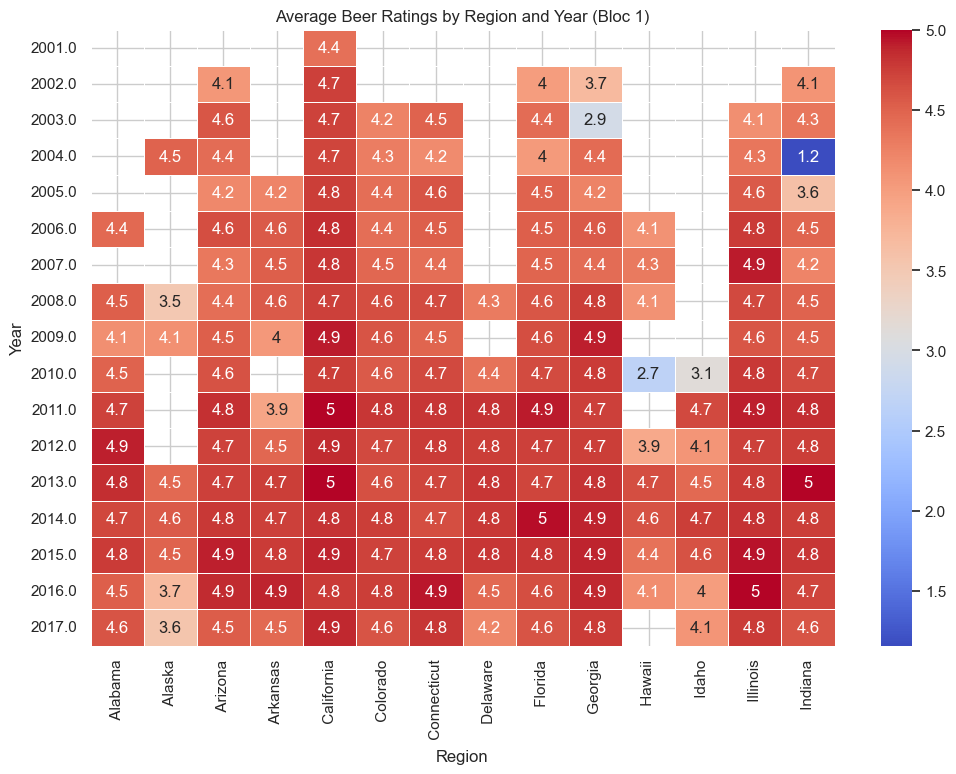

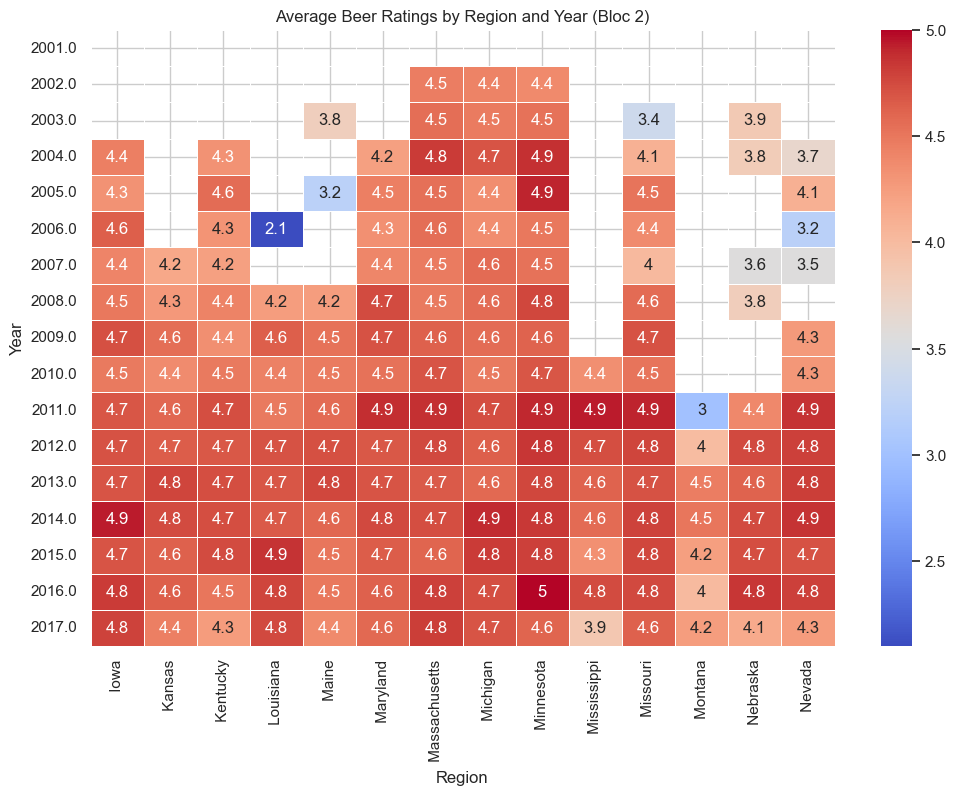

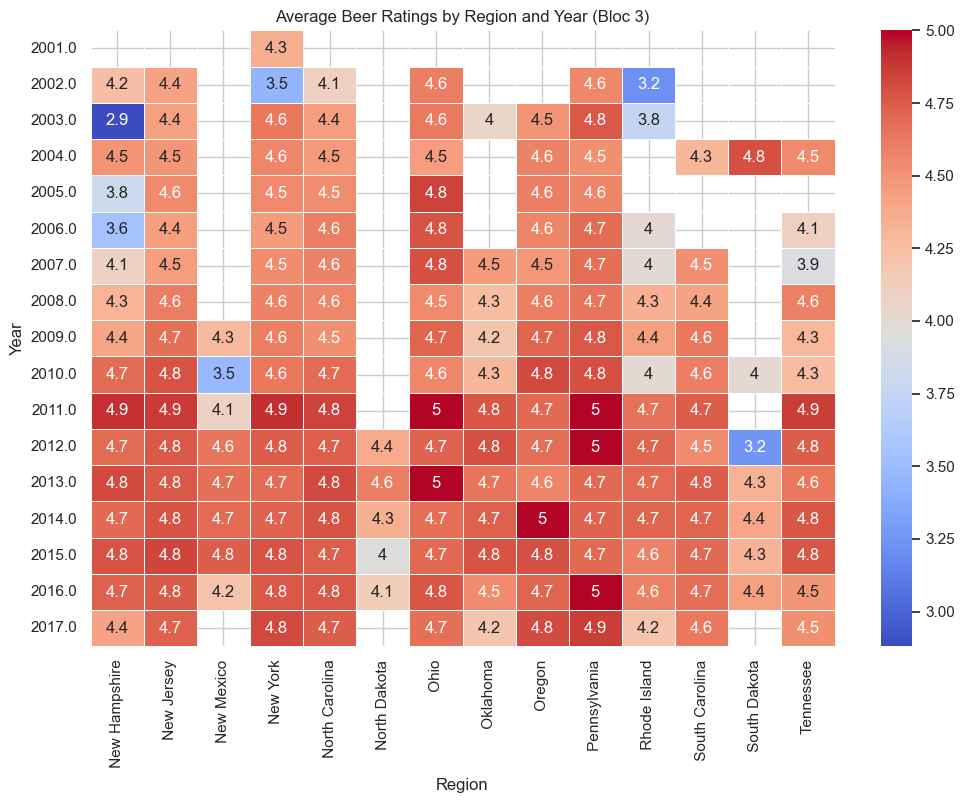

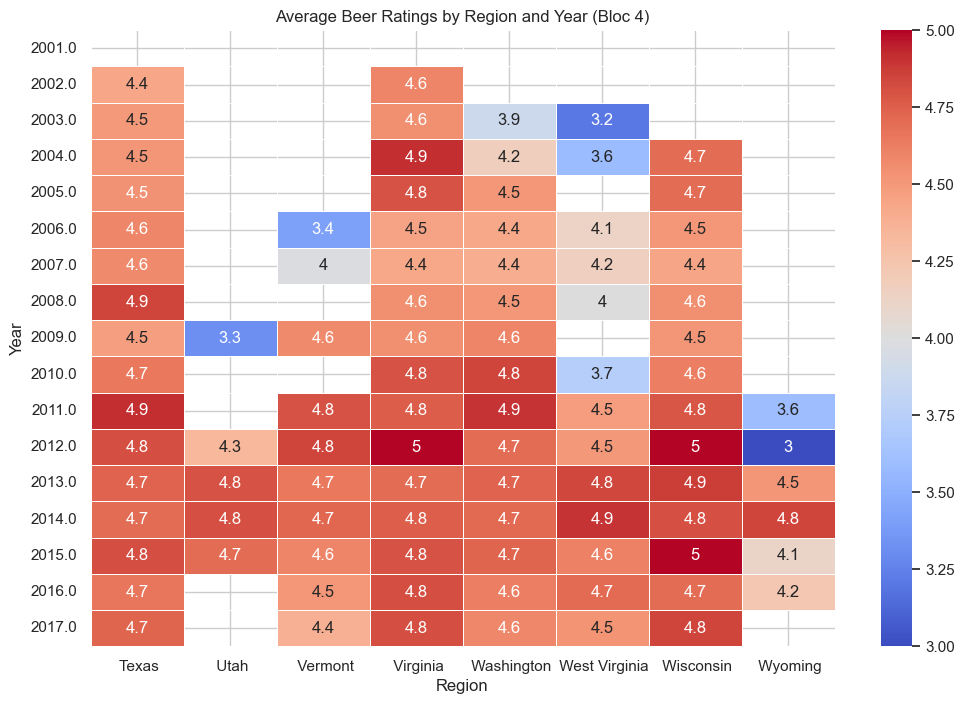

In [561]:

chunk_size = 14
num_chunks = len(pivot_data_us.columns) // chunk_size + (1 if len(pivot_data_us.columns) % chunk_size != 0 else 0)

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_us.iloc[:, start:end]  
    
    plt.figure(figsize=(12, 8))
    sns.heatmap(chunk, annot=True, cmap='coolwarm', linewidths=0.5)
    plt.title(f'Average Beer Ratings by Region and Year (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.show()

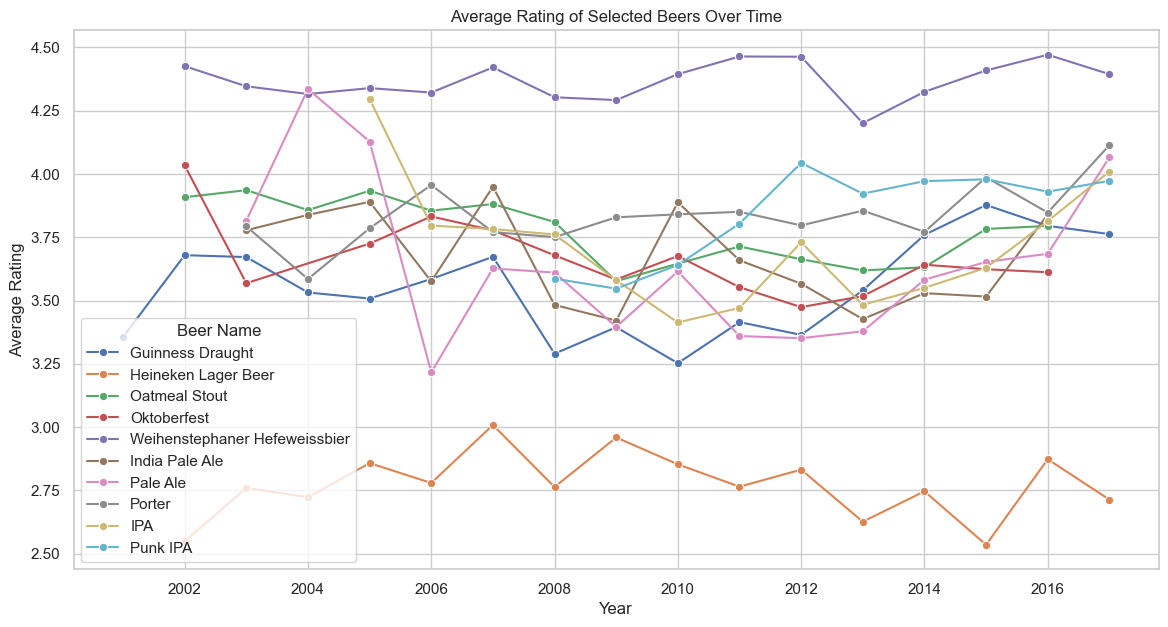

In [544]:

top_beers = weighted_avg_ratings['beer_name'].value_counts().nlargest(10).index
time_series_data = weighted_avg_ratings[weighted_avg_ratings['beer_name'].isin(top_beers)]

time_series_data = time_series_data.groupby(['year', 'beer_name']).agg({'weighted_avg_rating': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data, x='year', y='weighted_avg_rating', hue='beer_name', marker='o')
plt.title('Average Rating of Selected Beers Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Beer Name')
plt.show()


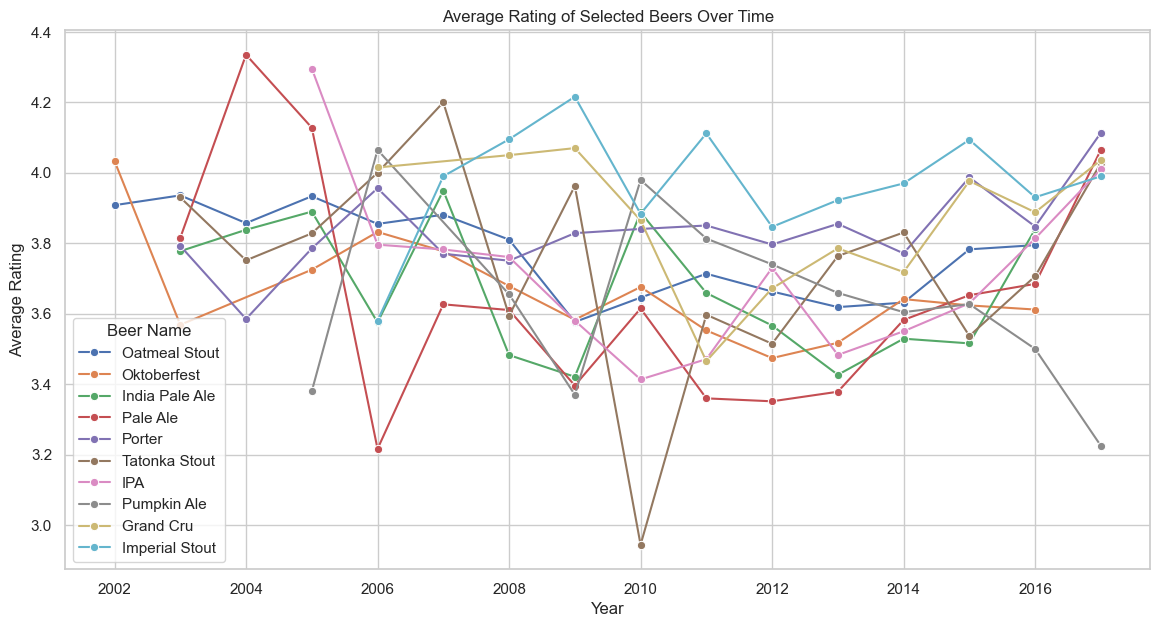

In [545]:

top_beers = weighted_avg_ratings[weighted_avg_ratings['location_user']=='United States']['beer_name'].value_counts().nlargest(10).index
time_series_data = weighted_avg_ratings[weighted_avg_ratings['beer_name'].isin(top_beers)]

time_series_data = time_series_data.groupby(['year', 'beer_name']).agg({'weighted_avg_rating': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data, x='year', y='weighted_avg_rating', hue='beer_name', marker='o')
plt.title('Average Rating of Selected Beers Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Beer Name')
plt.show()


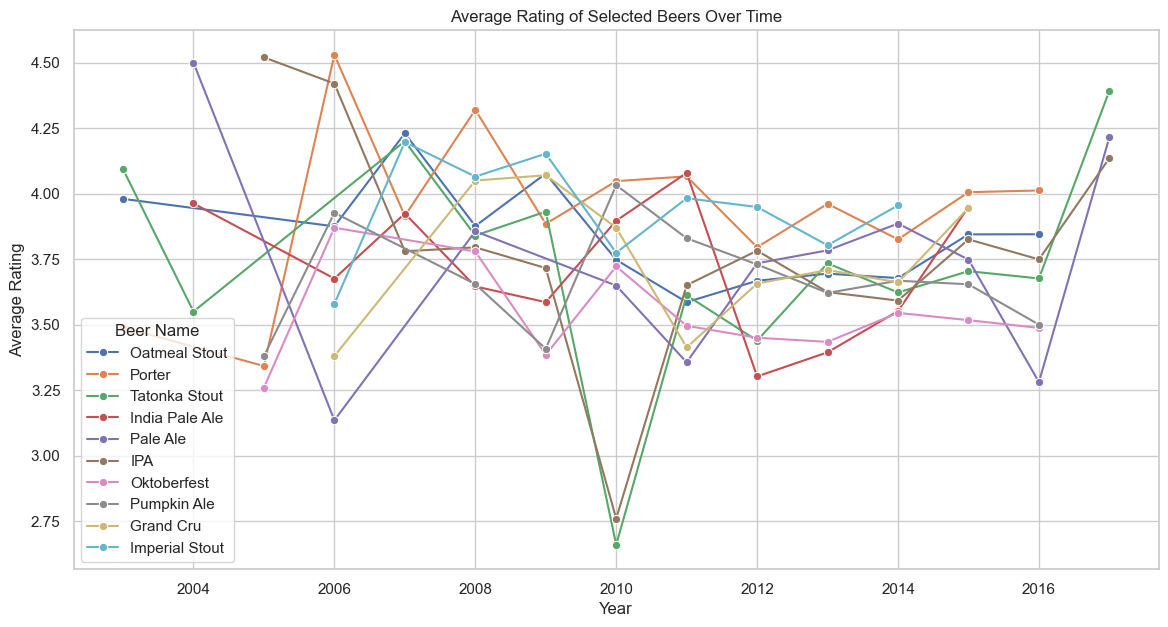

In [546]:

top_beers_cali = weighted_avg_ratings_us[weighted_avg_ratings_us['location_region_user']=='California']['beer_name'].value_counts().nlargest(10).index
time_series_data_cali = weighted_avg_ratings_us[weighted_avg_ratings_us['beer_name'].isin(top_beers)]

time_series_data_cali = time_series_data_cali.groupby(['year', 'beer_name']).agg({'weighted_avg_rating': 'mean'}).reset_index()

plt.figure(figsize=(14, 7))
sns.lineplot(data=time_series_data_cali, x='year', y='weighted_avg_rating', hue='beer_name', marker='o')
plt.title('Average Rating of Selected Beers Over Time')
plt.xlabel('Year')
plt.ylabel('Average Rating')
plt.legend(title='Beer Name')
plt.show()



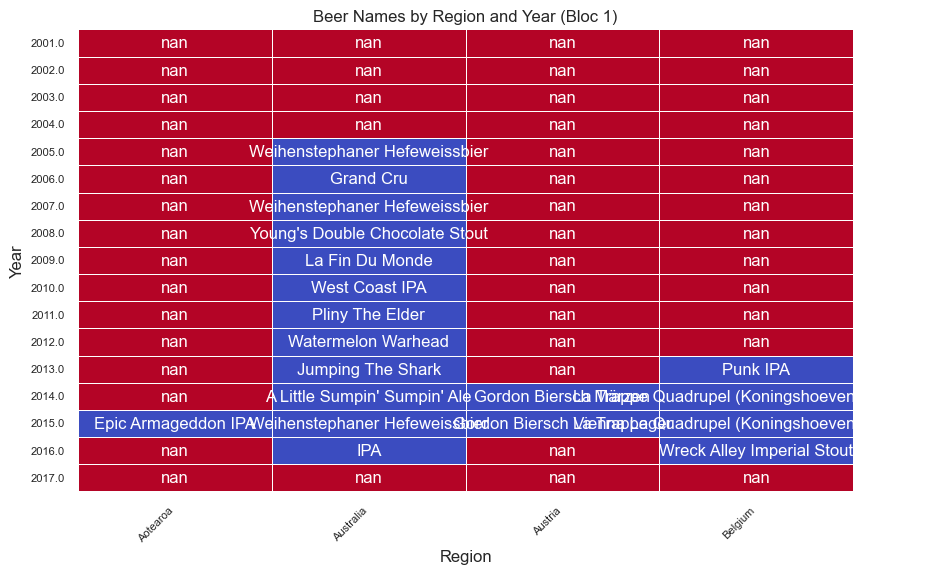

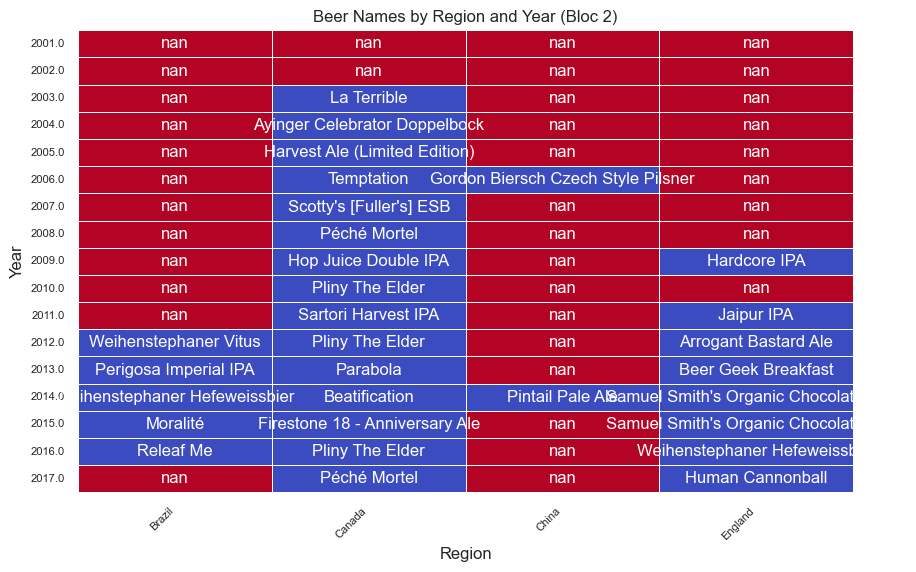

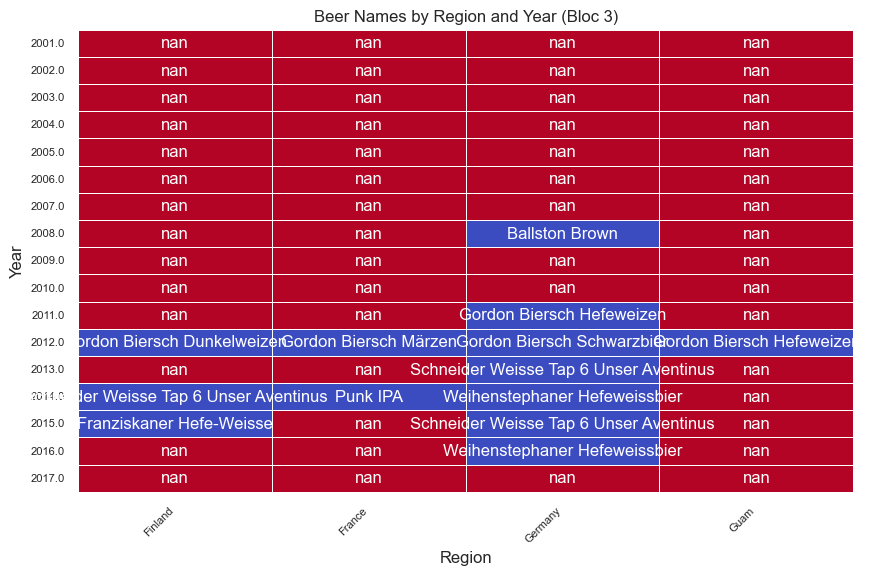

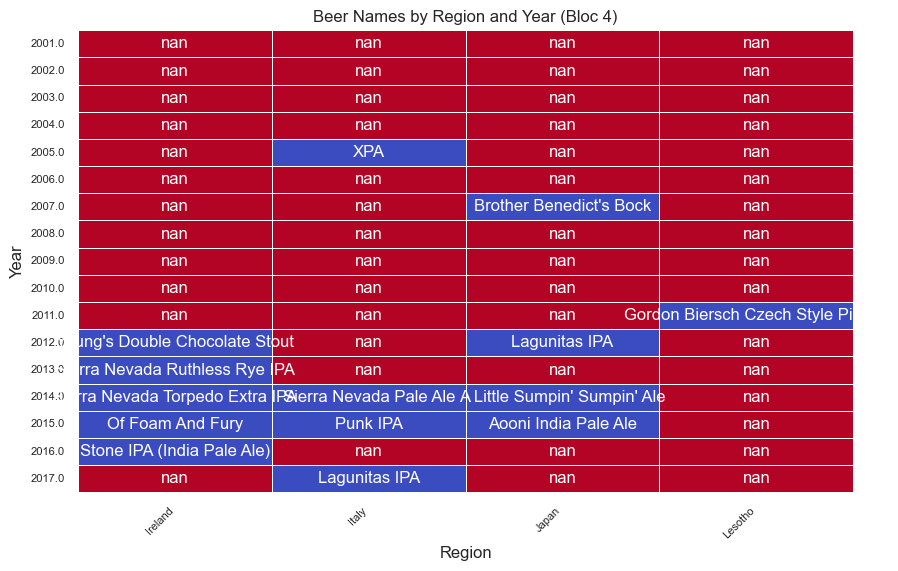

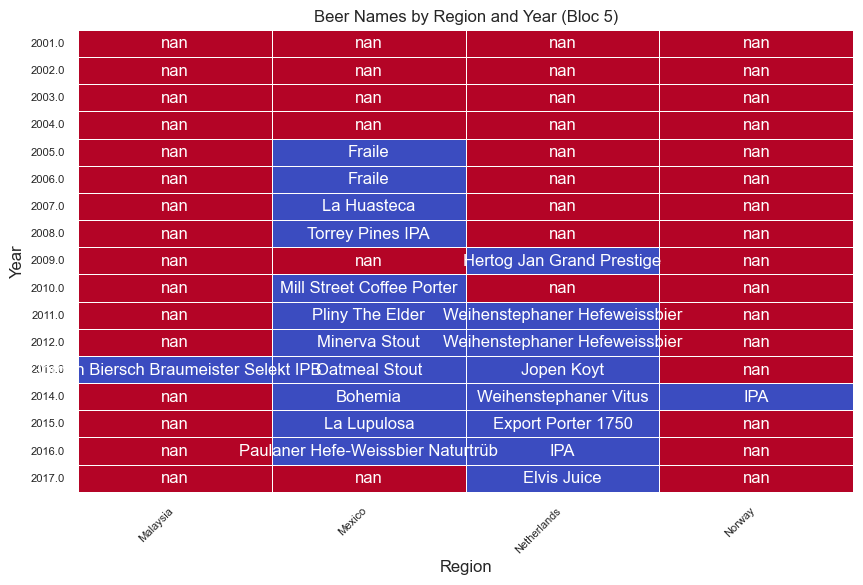

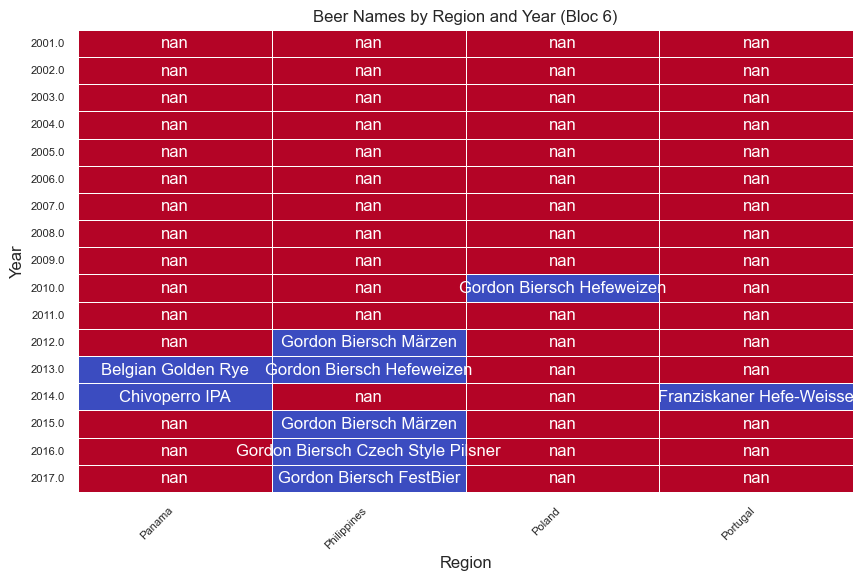

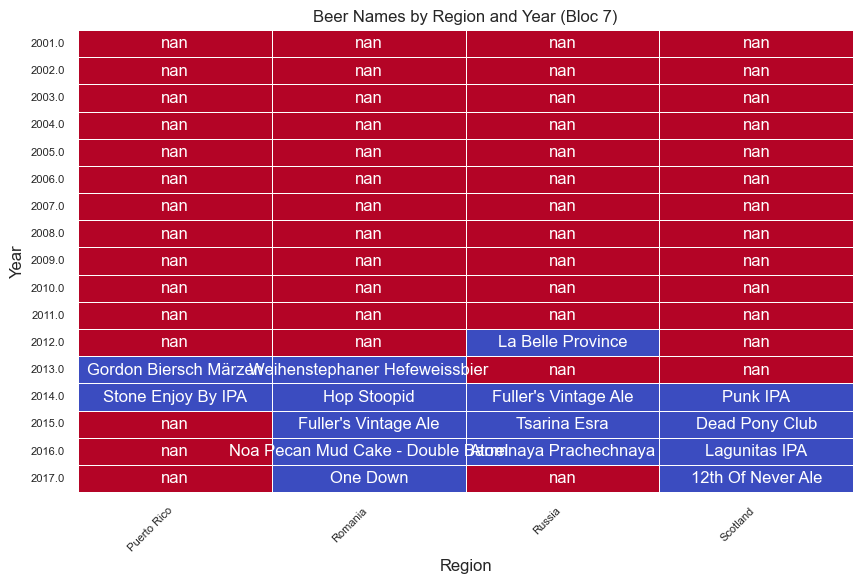

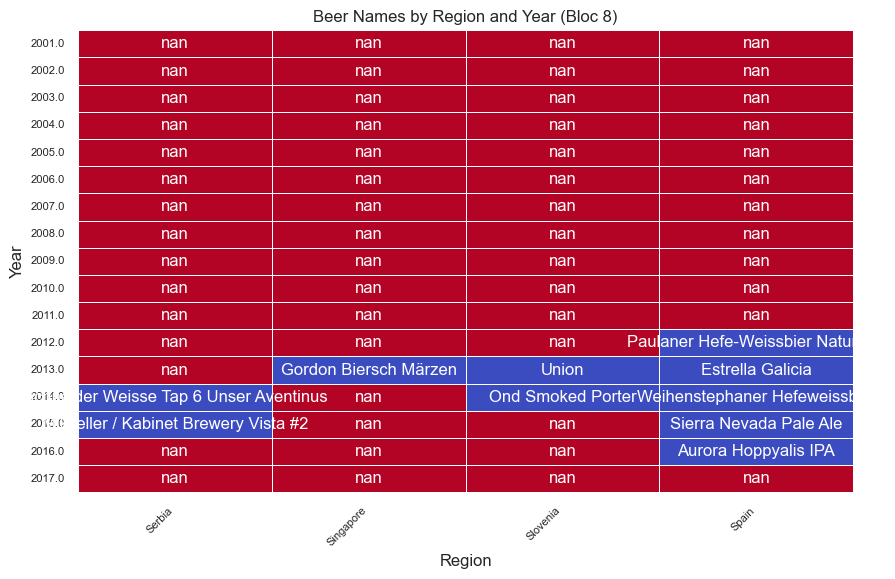

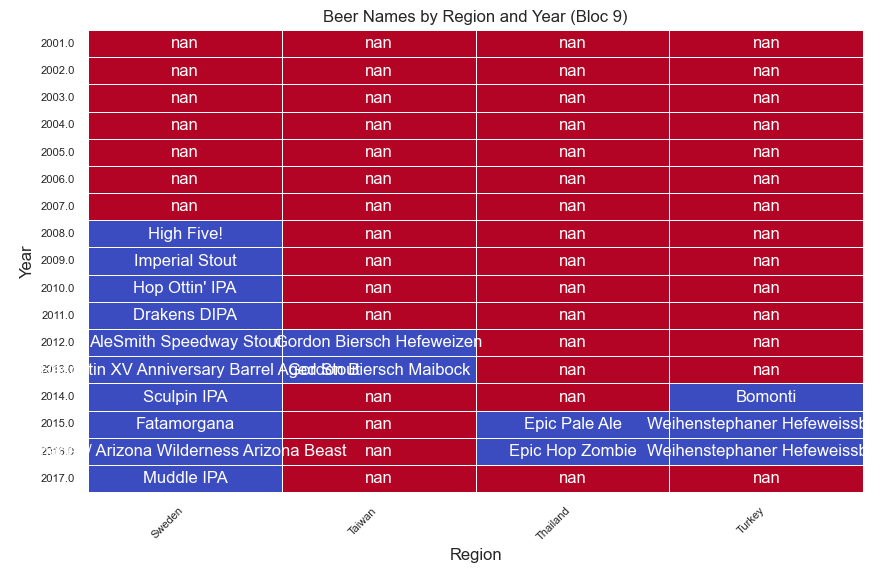

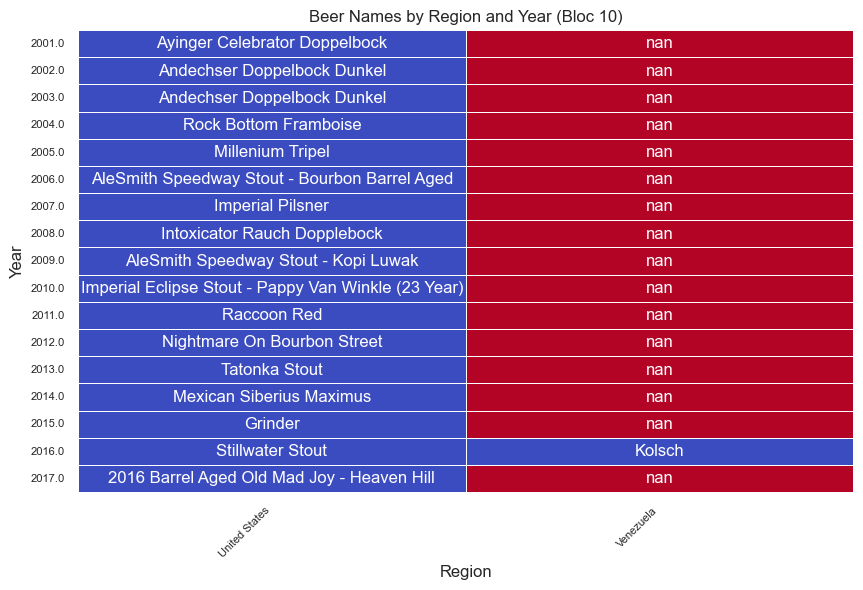

In [567]:

pivot_data_name = top_ranked_beers.pivot_table(
    values='beer_name', 
    index='year', 
    columns='location_user', 
    aggfunc=lambda x: ', '.join(x.dropna())
)


chunk_size = 4  
num_chunks = (pivot_data_name.shape[1] + chunk_size - 1) // chunk_size

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_name.iloc[:, start:end]  
    
   
    plt.figure(figsize=(10, 6))  
    sns.heatmap(
        chunk.isna().astype(int),  
        annot=chunk, fmt='', cmap='coolwarm', linewidths=0.5, cbar=False
    )
    plt.title(f'Beer Names by Region and Year (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()



ModuleNotFoundError: No module named 'folium'

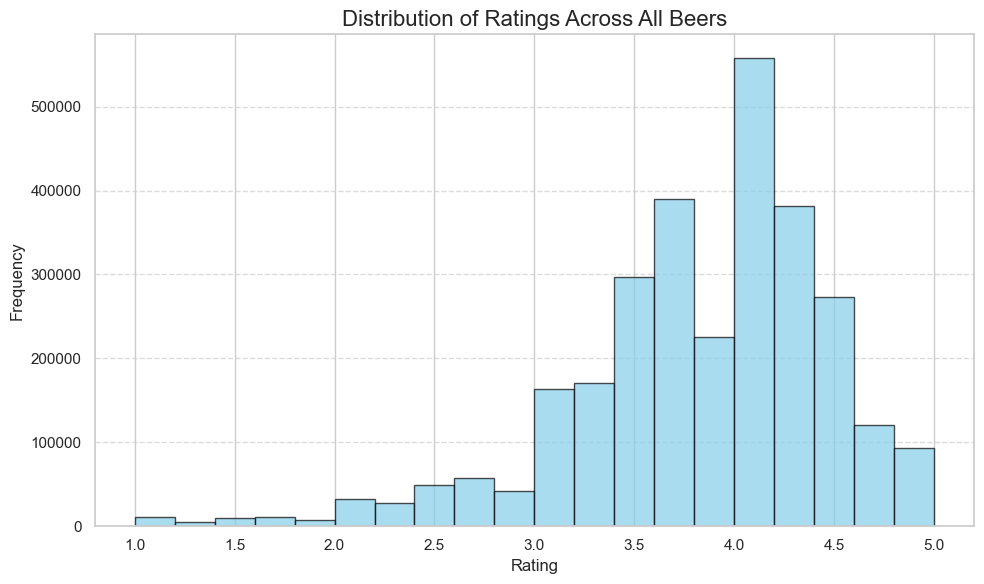

In [576]:


# Assuming 'rating' column in reviews_df contains the rating for each review

# Step 1: Plot the histogram
plt.figure(figsize=(10, 6))
plt.hist(reviews_df['rating'], bins=20, color='skyblue', edgecolor='black', alpha=0.7)

# Step 2: Add titles and labels
plt.title('Distribution of Ratings Across All Beers', fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show plot
plt.tight_layout()
plt.show()


In [591]:

review_counts_br = reviews_df.groupby(['brewery_id', 'year', 'location_user']).size().reset_index(name='review_count')


reviews_with_counts_br = pd.merge(reviews_df, review_counts_br, on=['brewery_id', 'year', 'location_user'])
filtered_reviews_br = reviews_with_counts_br[reviews_with_counts_br['review_count'] >= 5]

weighted_avg_ratings_br = filtered_reviews_br.groupby(['brewery_id','brewery_name', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


weighted_avg_ratings_br['rank'] = (
    weighted_avg_ratings_br.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

# Check results


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/1567738573.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings_br = filtered_reviews_br.groupby(['brewery_id','brewery_name', 'year','review_count', 'location_user']).apply(


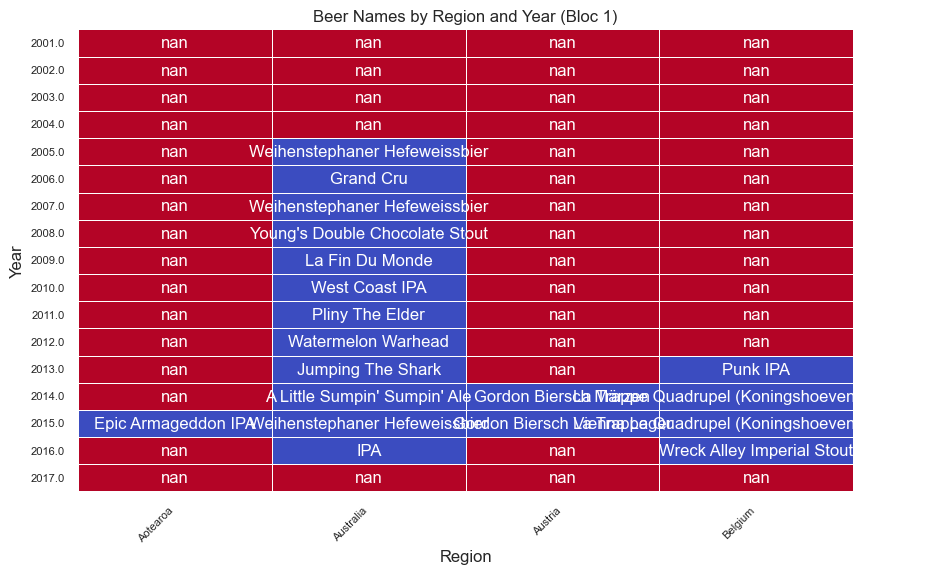

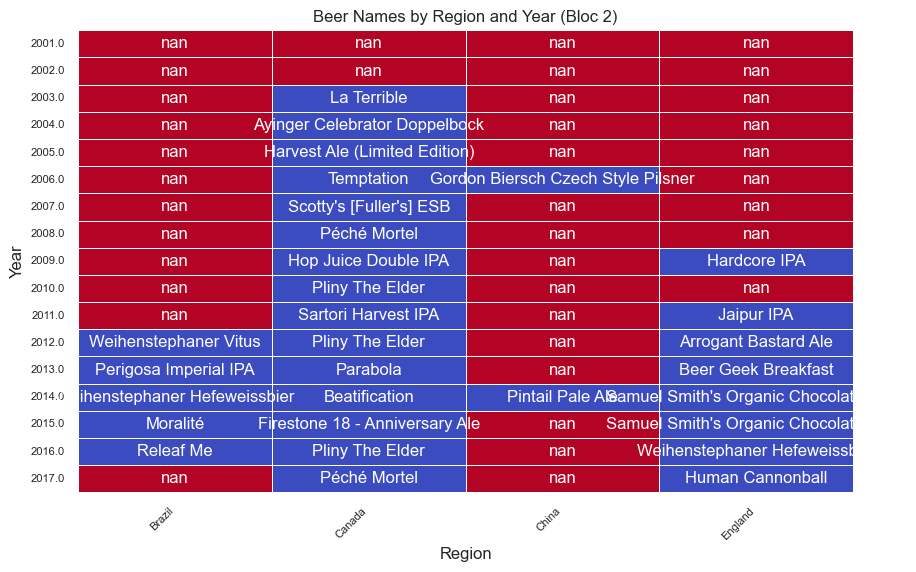

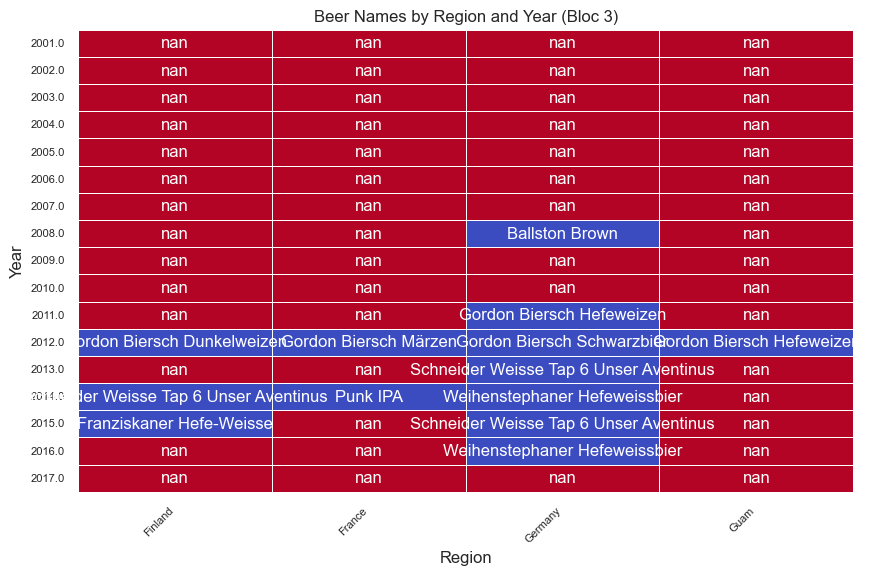

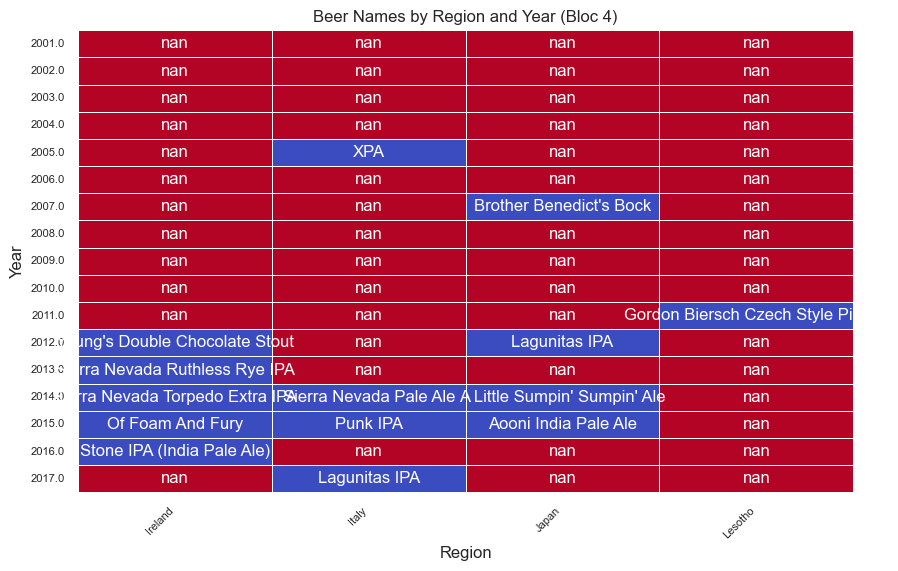

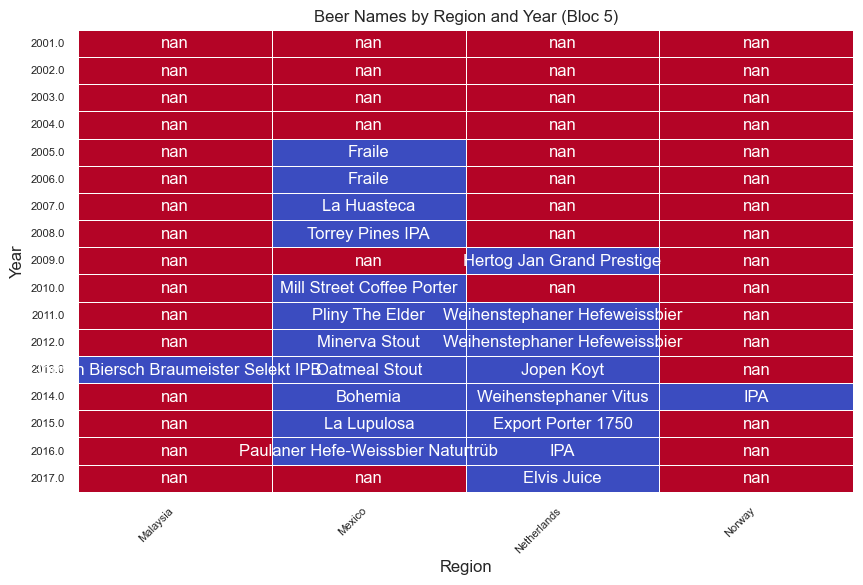

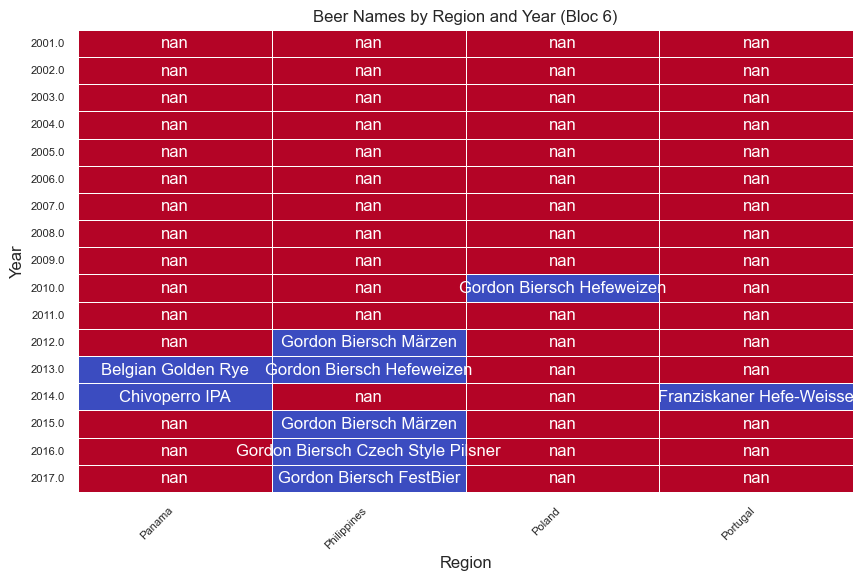

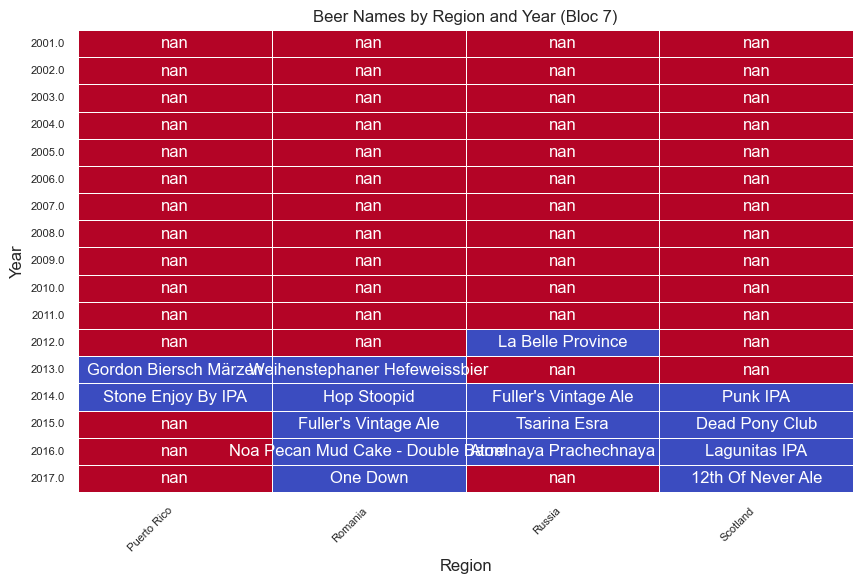

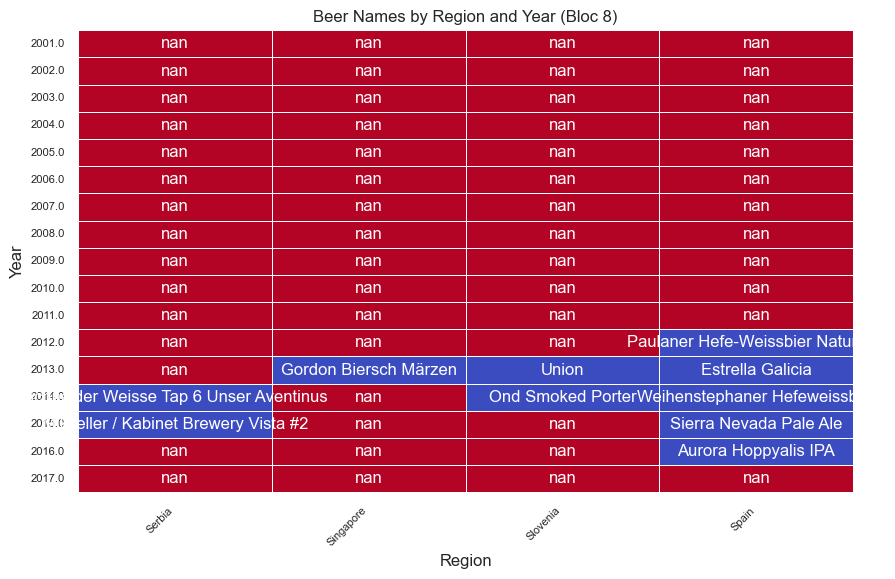

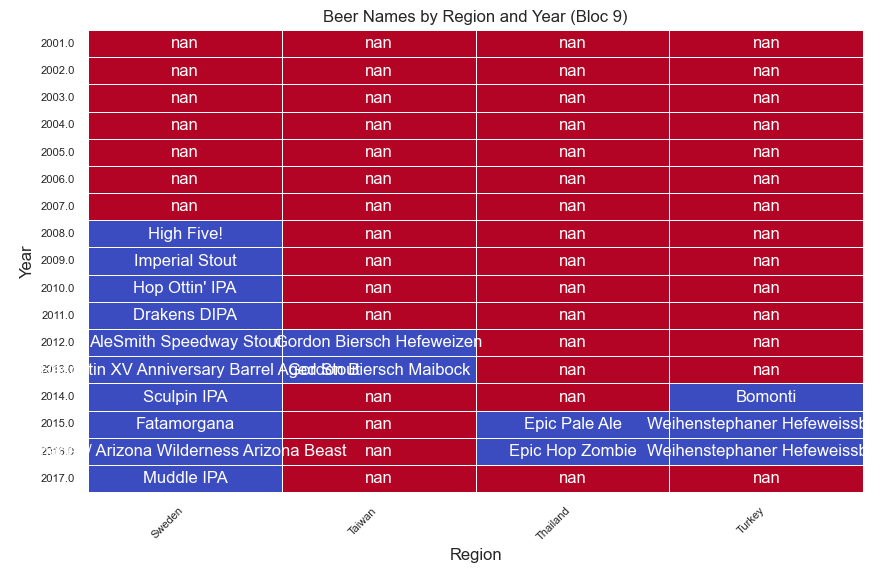

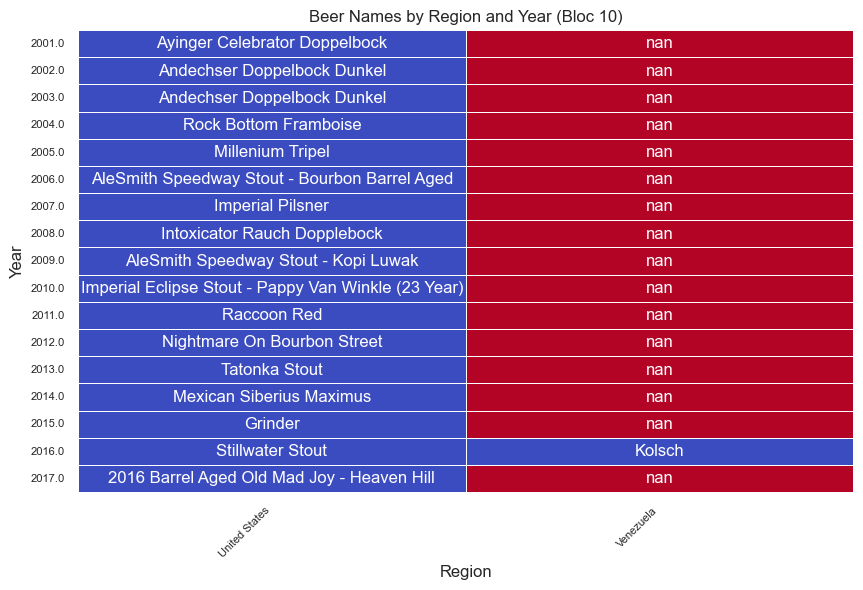

In [594]:
top_ranked_beers_br = weighted_avg_ratings_br[weighted_avg_ratings_br['rank'] == 1]

# Creazione della tabella pivot con i nomi delle birre concatenati
pivot_data_br = top_ranked_beers_br.pivot_table(
    values='brewery_name', 
    index='year', 
    columns='location_user', 
    aggfunc=lambda x: ', '.join(x.dropna())
)

# Modifica delle dimensioni per ogni blocco
chunk_size = 4  # Ridotto il numero di regioni per blocco, per evitare che l'immagine diventi troppo grande
num_chunks = (pivot_data_name.shape[1] + chunk_size - 1) // chunk_size

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_name.iloc[:, start:end]  # Seleziona le colonne del blocco
    
    # Creazione della heatmap binaria solo per il layout
    plt.figure(figsize=(10, 6))  # Impostiamo una dimensione fissa per la figura
    sns.heatmap(
        chunk.isna().astype(int),  # Mappa binaria per layout
        annot=chunk, fmt='', cmap='coolwarm', linewidths=0.5, cbar=False
    )
    plt.title(f'Beer Names by Region and Year (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()



Correlazione tra numero di recensioni e valutazione media ponderata: 0.03901737838612806


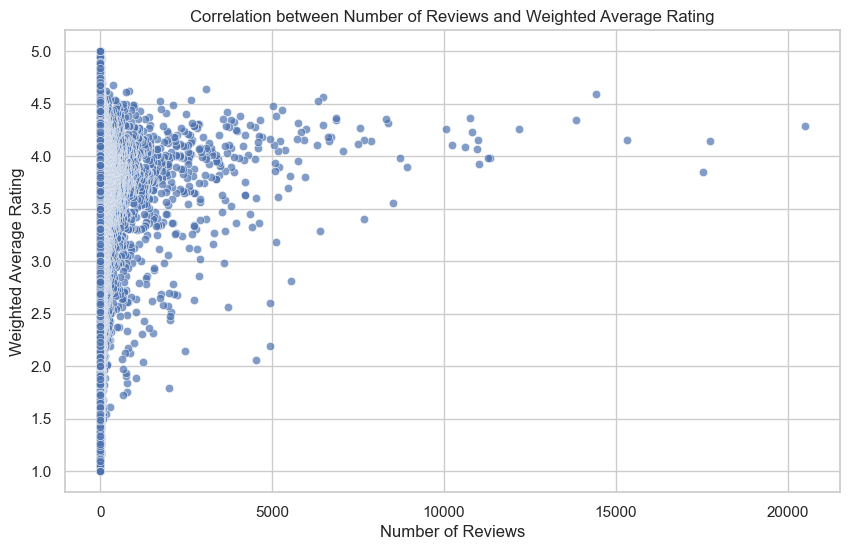

In [602]:
import pandas as pd
import matplotlib.pyplot as plt


# Sample data aggregation with weighted average rating
beer_stats = reviews_df.groupby('beer_id').agg(
    total_ratings=('rating', lambda x: (x * reviews_df.loc[x.index, 'nbr_ratings_user']).sum()),  # Multiply ratings by review count
    total_reviews=('nbr_ratings_user', 'sum')  # Sum of number of reviews per beer
).reset_index()

# Calculate the weighted average rating
beer_stats['weighted_average_rating'] = beer_stats['total_ratings'] / beer_stats['total_reviews']

# Now, calculate review count (number of reviews)
beer_stats['review_count'] = reviews_df.groupby('beer_id')['rating'].count().values

# Sort by review count for better visualization (optional)
beer_stats = beer_stats.sort_values('review_count', ascending=False)
correlation = beer_stats[['review_count', 'weighted_average_rating']].corr().iloc[0, 1]

print(f"Correlation between Number of reviews and Weighted average rating: {correlation}")


# Visualize the correlation between review count and weighted average rating
plt.figure(figsize=(10, 6))
sns.scatterplot(data=beer_stats, x='review_count', y='weighted_average_rating', alpha=0.7)
plt.title('Correlation between Number of Reviews and Weighted Average Rating')
plt.xlabel('Number of Reviews')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()

In [608]:

review_counts_fl = reviews_df.groupby(['style', 'year', 'location_user']).size().reset_index(name='review_count')


reviews_with_counts_fl = pd.merge(reviews_df, review_counts_fl, on=['style', 'year', 'location_user'])
filtered_reviews_fl = reviews_with_counts_fl[reviews_with_counts_fl['review_count'] >= 5]

weighted_avg_ratings_fl = filtered_reviews_fl.groupby(['style', 'year','review_count', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')


weighted_avg_ratings_fl['rank'] = (
    weighted_avg_ratings_fl.sort_values(['year', 'location_user', 'weighted_avg_rating', 'review_count'], 
                                        ascending=[True, True, False, False])
    .groupby(['year', 'location_user'])
    .cumcount() + 1
)

# Check results


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/1705808618.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_ratings_fl = filtered_reviews_fl.groupby(['style', 'year','review_count', 'location_user']).apply(


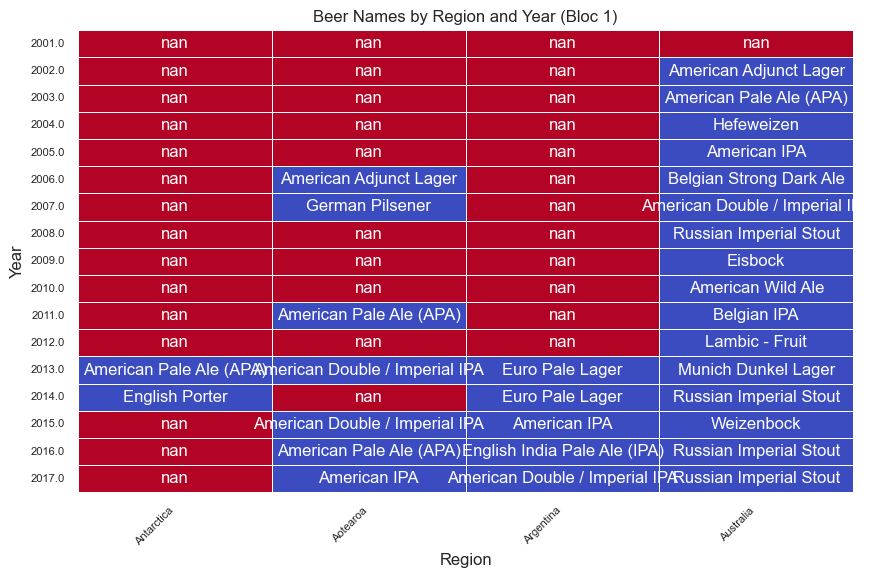

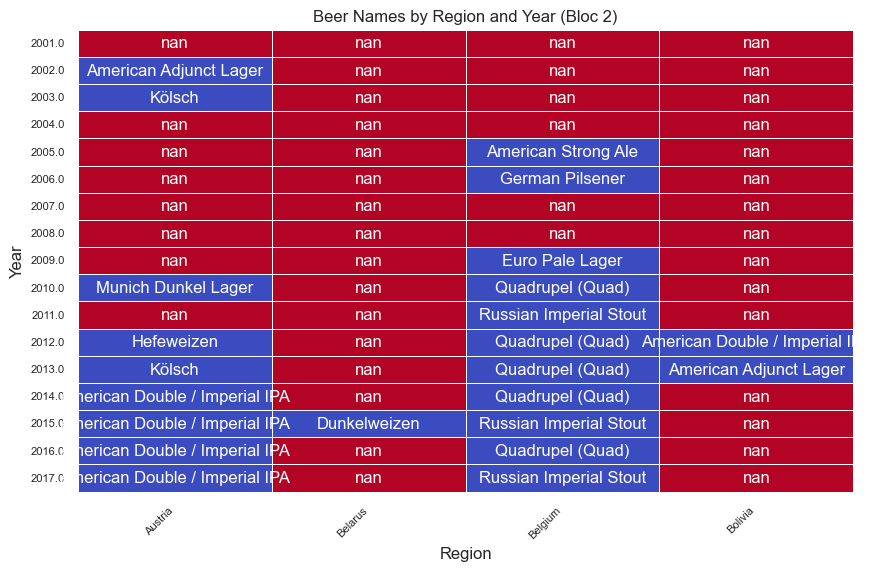

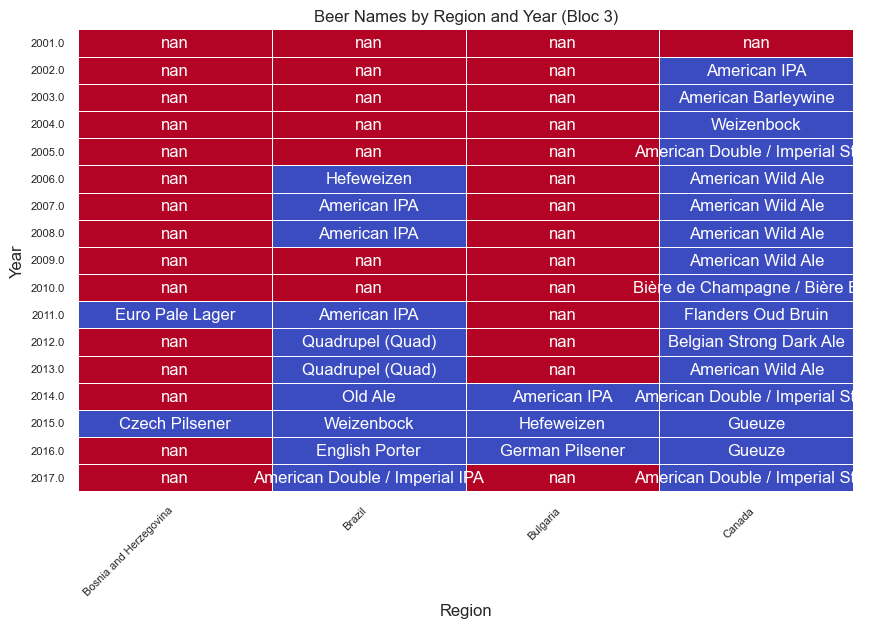

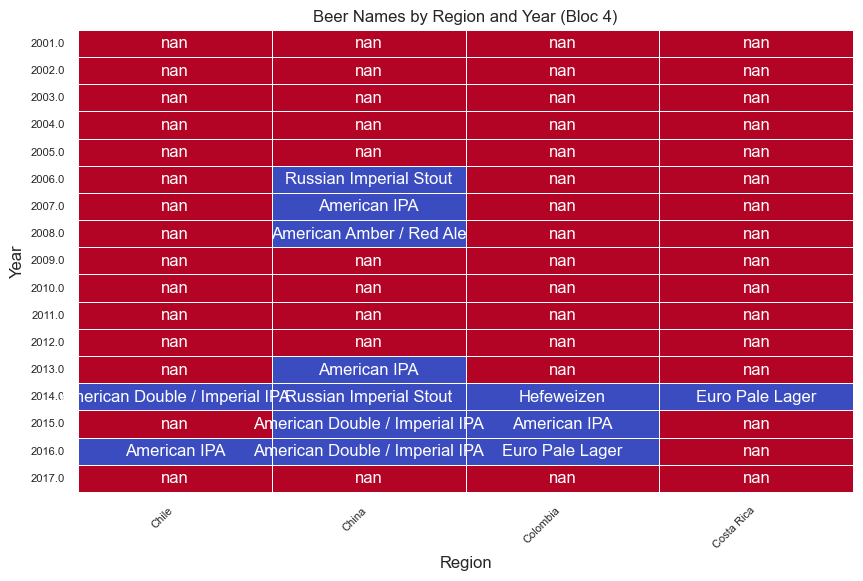

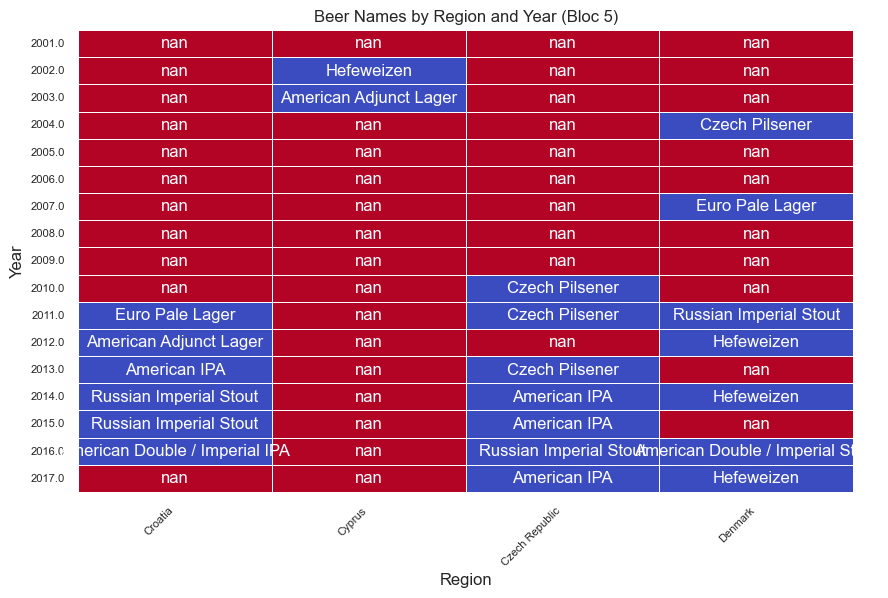

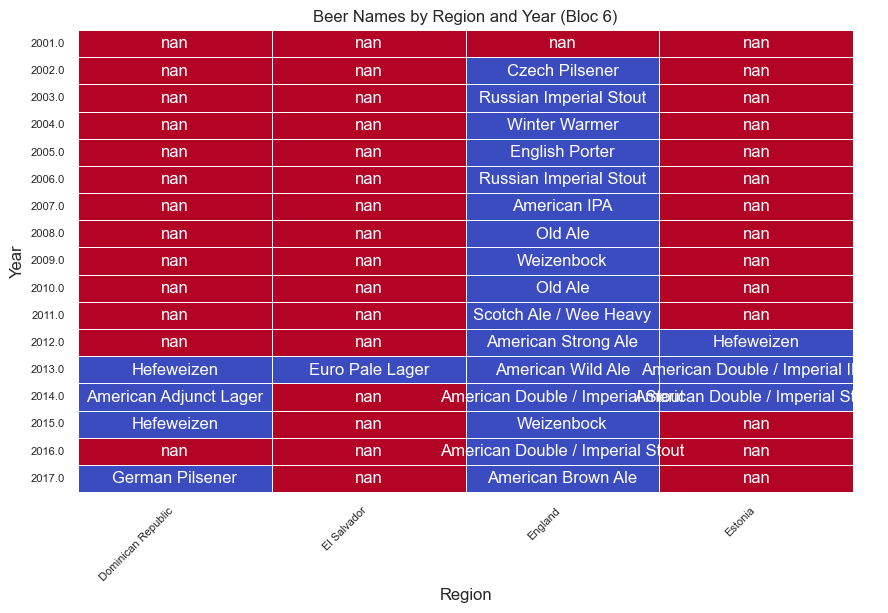

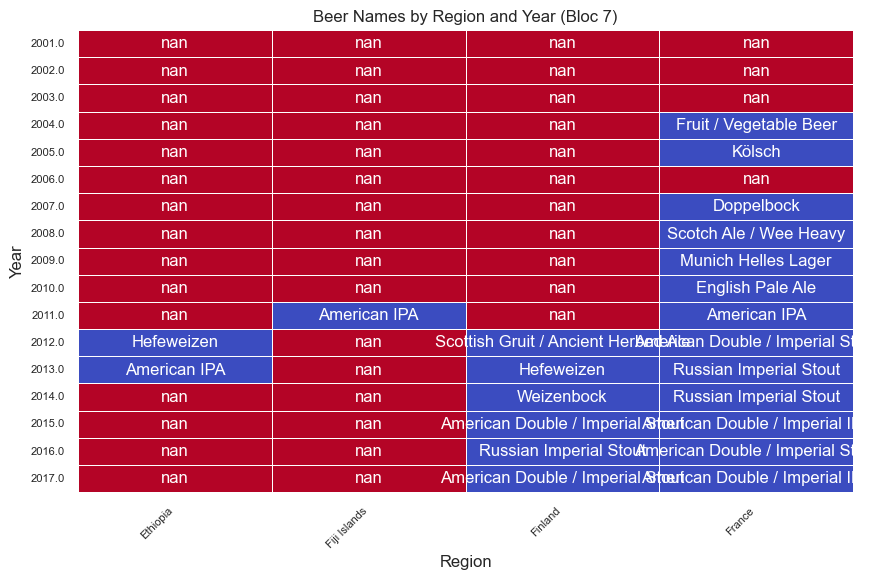

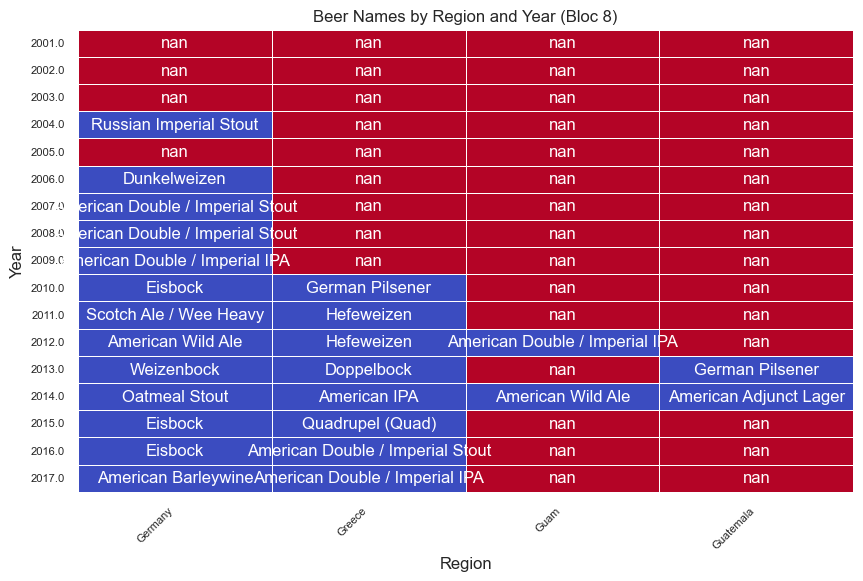

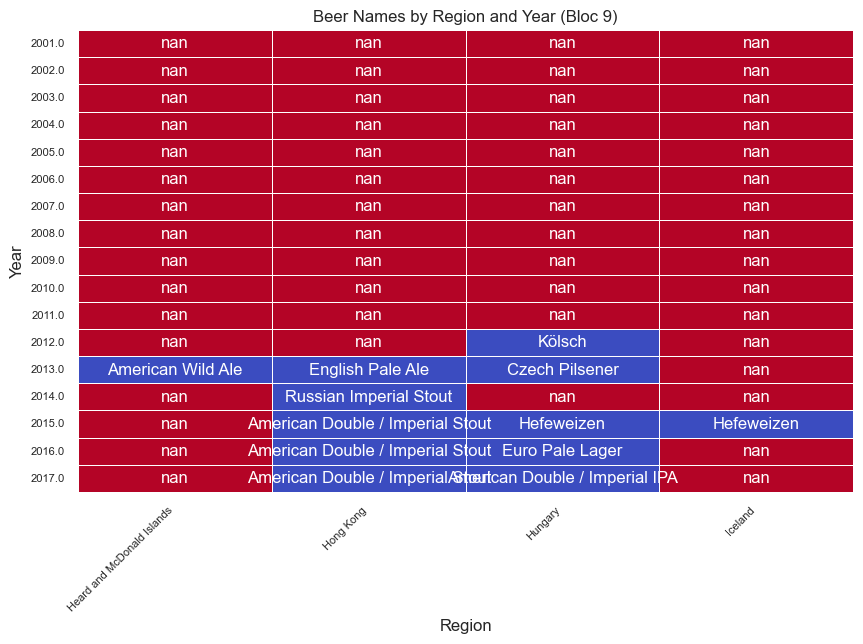

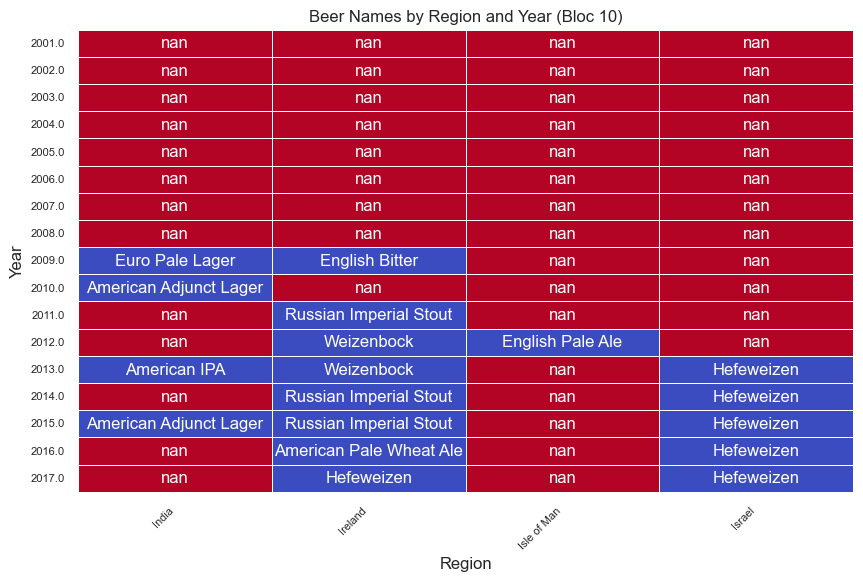

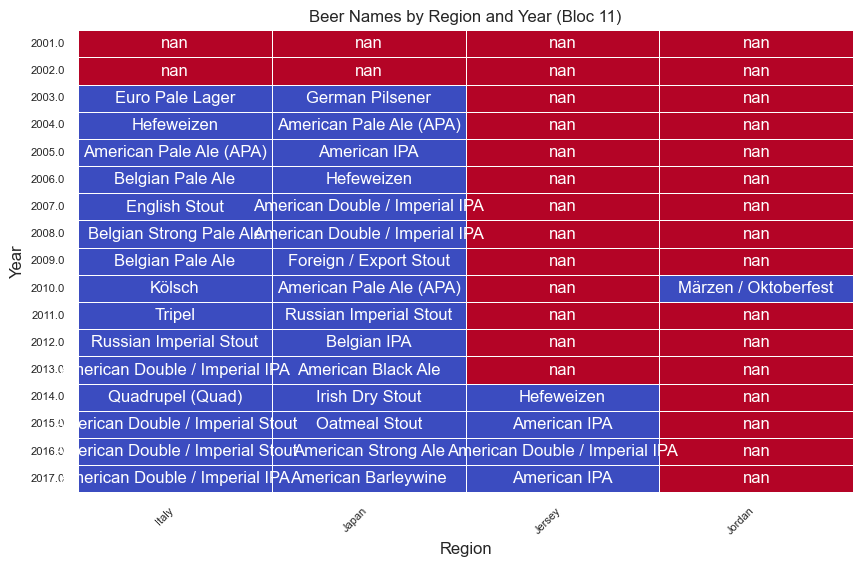

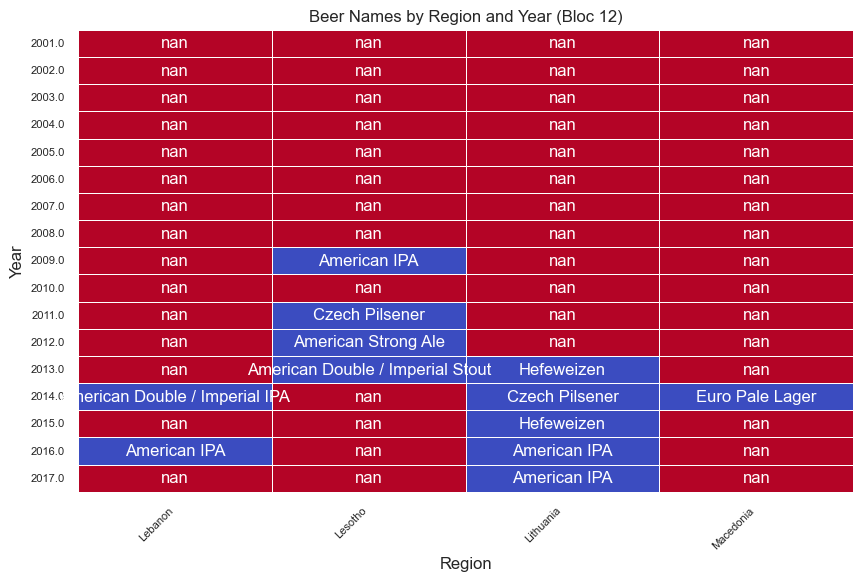

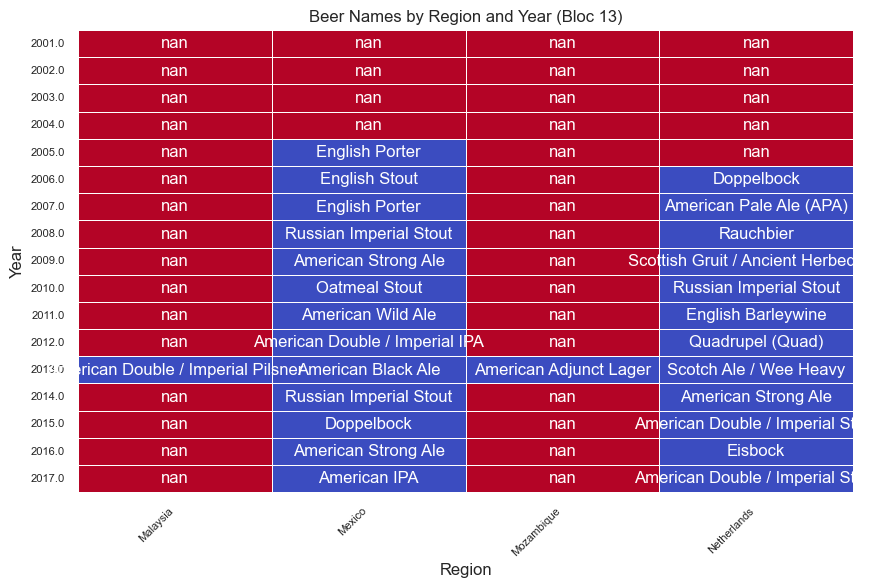

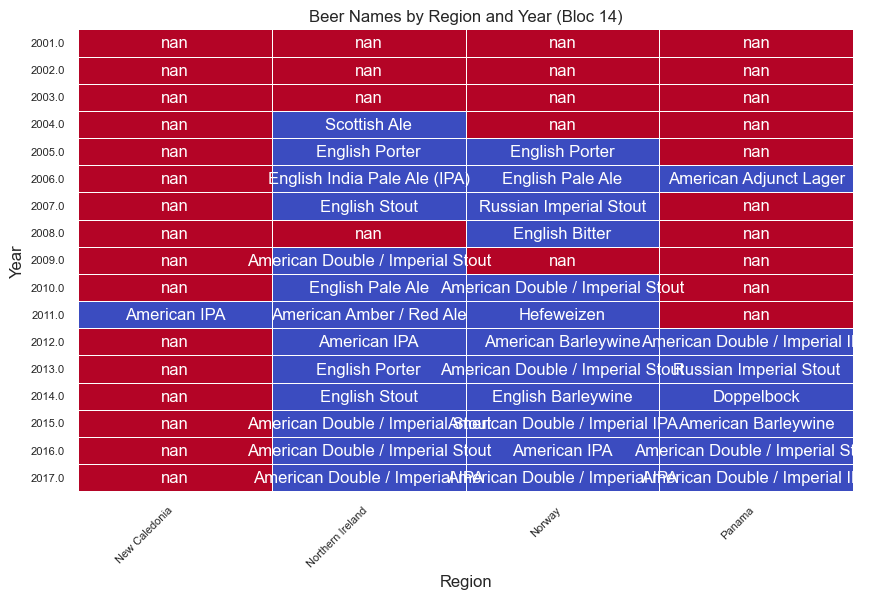

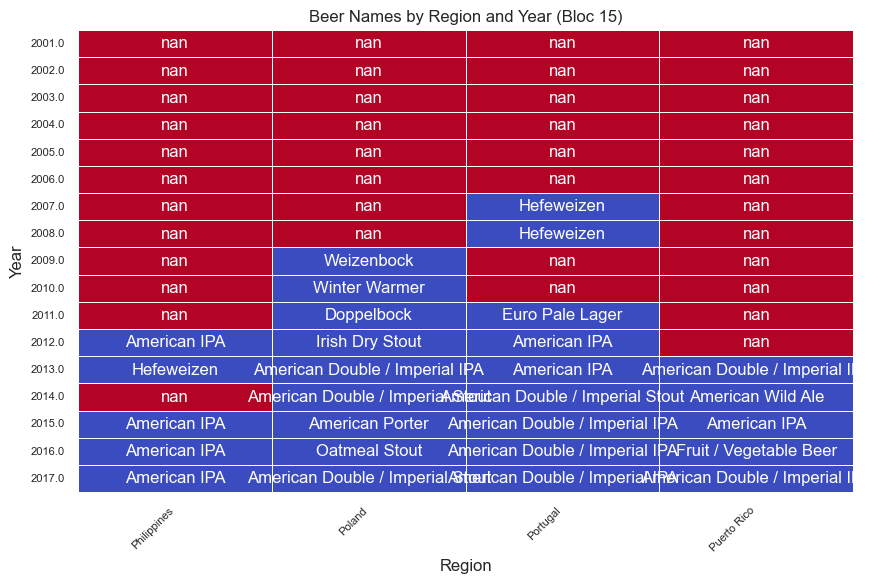

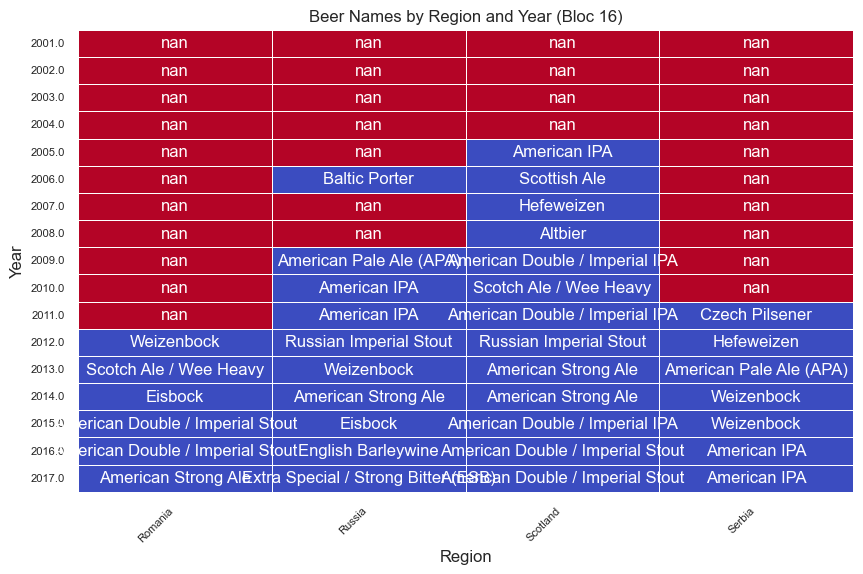

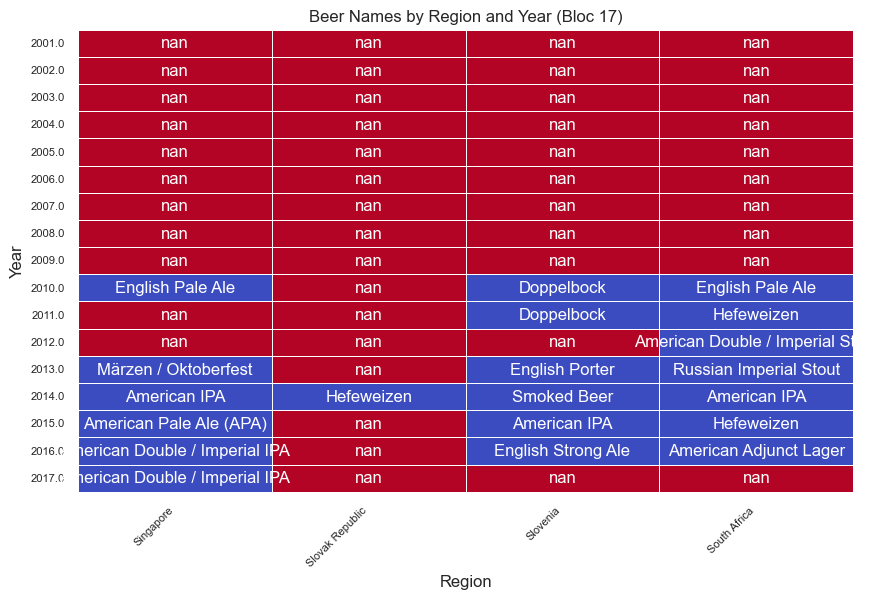

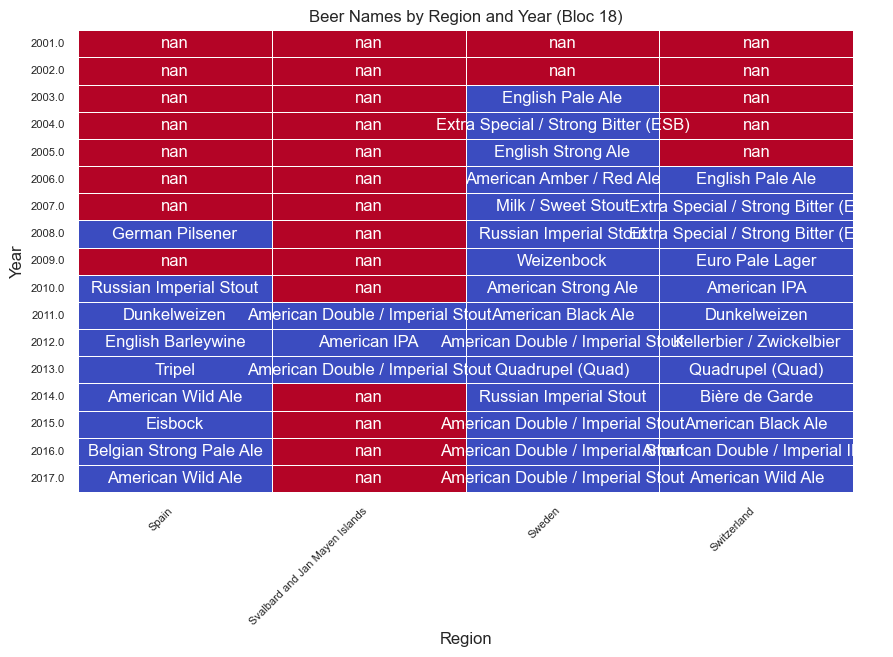

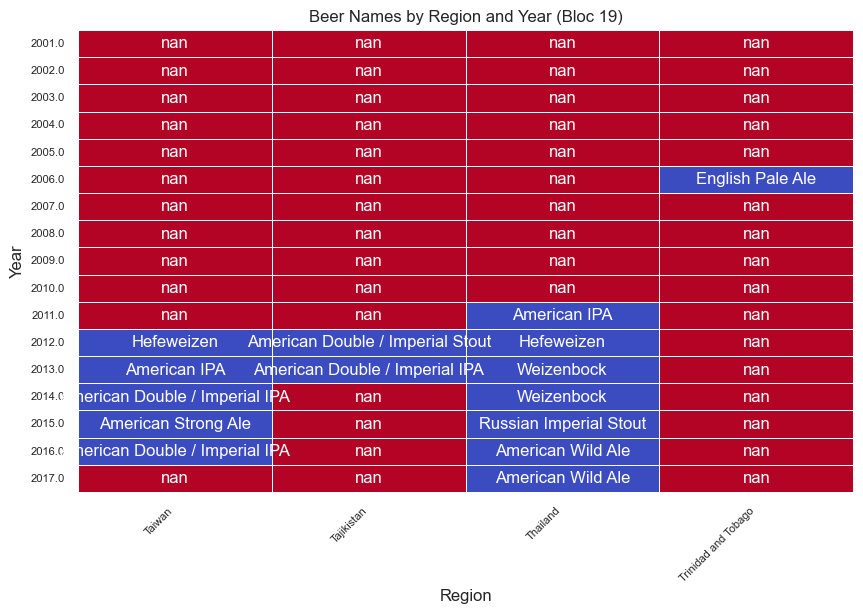

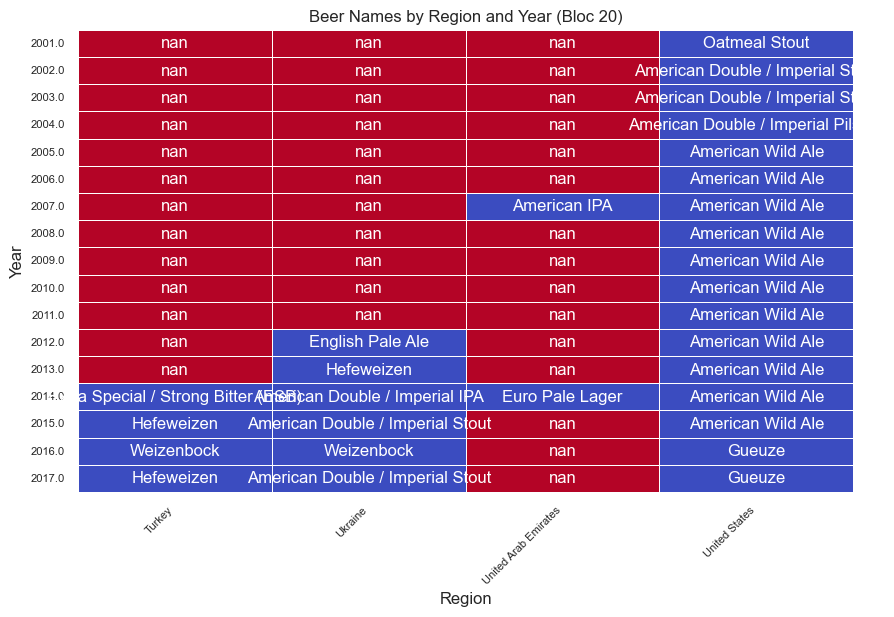

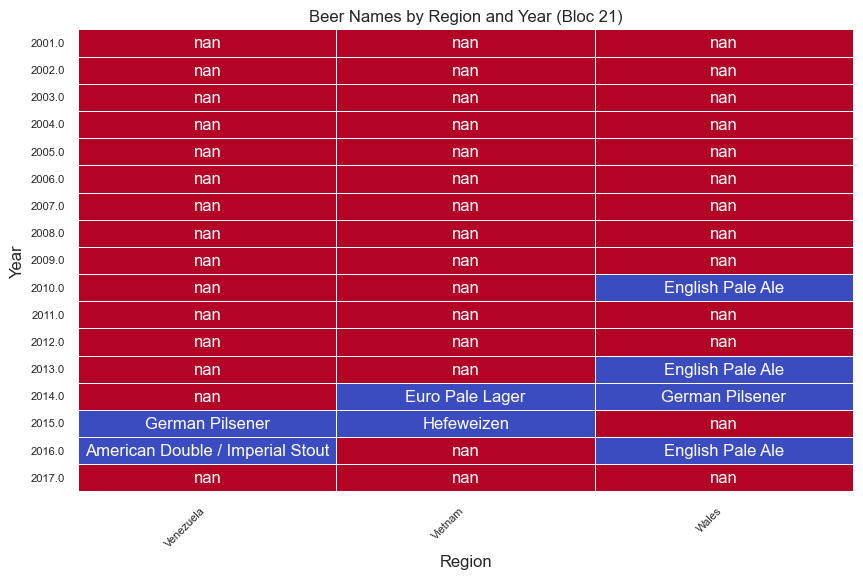

In [610]:
top_ranked_beers_fl = weighted_avg_ratings_fl[weighted_avg_ratings_fl['rank'] == 1]

pivot_data_fl = top_ranked_beers_fl.pivot_table(
    values='style', 
    index='year', 
    columns='location_user', 
    aggfunc=lambda x: ', '.join(x.dropna())
)


chunk_size = 4  
num_chunks = (pivot_data_fl.shape[1] + chunk_size - 1) // chunk_size

for i in range(num_chunks):
    start = i * chunk_size
    end = start + chunk_size
    chunk = pivot_data_fl.iloc[:, start:end] 
   
    plt.figure(figsize=(10, 6)) 
    sns.heatmap(
        chunk.isna().astype(int), 
        annot=chunk, fmt='', cmap='coolwarm', linewidths=0.5, cbar=False
    )
    plt.title(f'Beer Names by Region and Year (Bloc {i+1})')
    plt.xlabel('Region')
    plt.ylabel('Year')
    plt.xticks(rotation=45, ha='right', fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/3444058075.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_styles = reviews_df.groupby('style').apply(


Correlazione tra style (codificato numericamente) e valutazione media ponderata: -0.8776172672815102


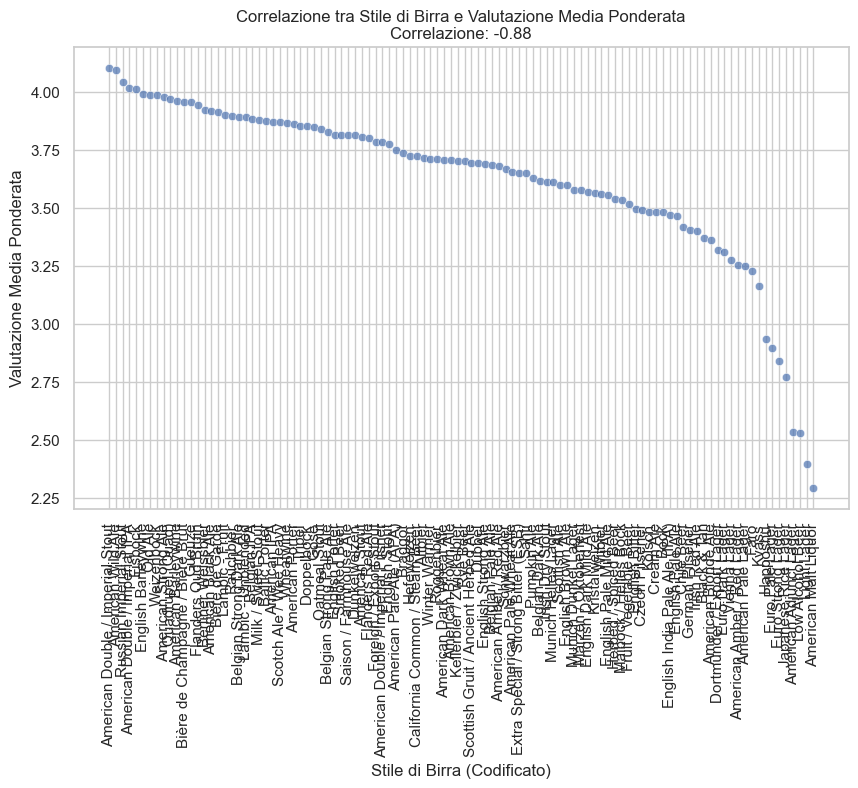

In [616]:
weighted_avg_styles = reviews_df.groupby('style').apply(
    lambda x: (x['rating'] * x['nbr_ratings_user']).sum() / x['nbr_ratings_user'].sum()
).reset_index(name='weighted_avg_rating')

weighted_avg_styles = weighted_avg_styles.sort_values('weighted_avg_rating', ascending=False)

weighted_avg_styles['style_code'] = pd.factorize(weighted_avg_styles['style'])[0]

correlation = weighted_avg_styles[['style_code', 'weighted_avg_rating']].corr().iloc[0, 1]

print(f"Correlation between  style (coded) e Weighted average rating: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_styles, x='style_code', y='weighted_avg_rating', alpha=0.7)
plt.title(f'Correlation between  style (coded) e Weighted average rating\nCorrelation: {correlation:.2f}')
plt.xlabel('Style ')
plt.ylabel('weighted average rating')
plt.xticks(weighted_avg_styles['style_code'], weighted_avg_styles['style'], rotation=90)
plt.grid(True)
plt.show()


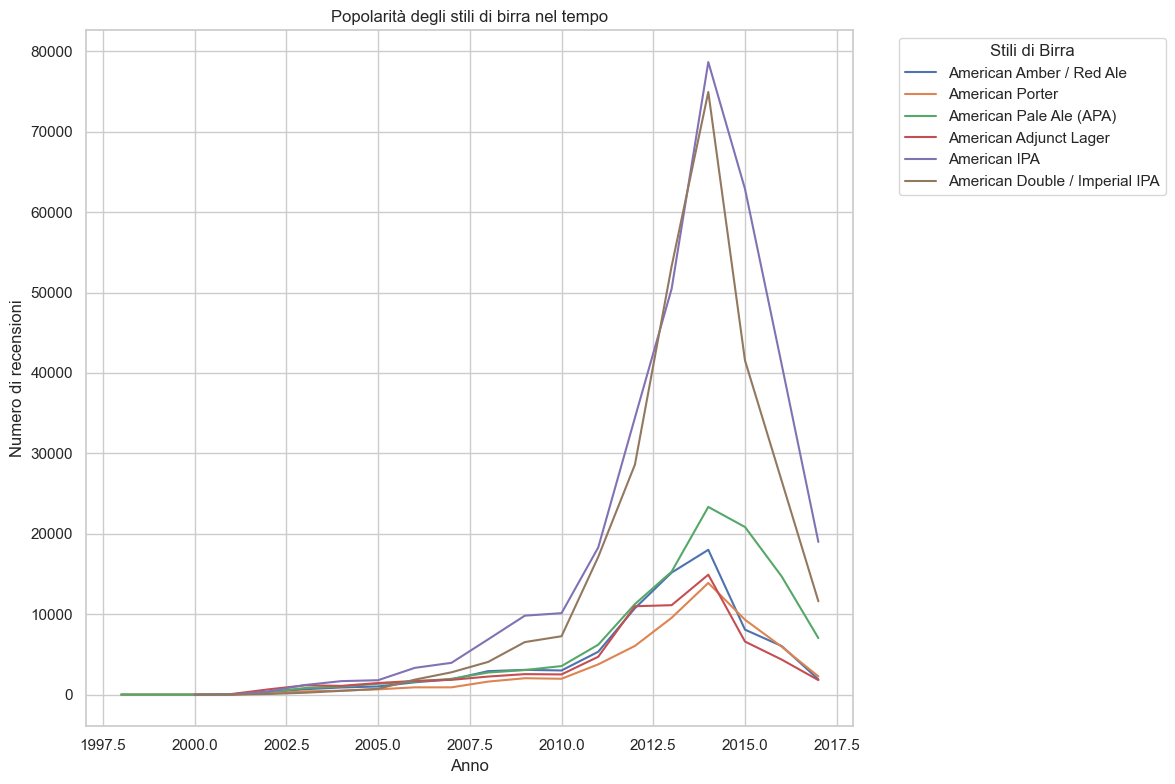

I 10 stili di birra con la valutazione media più alta:
style
American Wild Ale                   4.291529
American Double / Imperial IPA      4.190630
American Double / Imperial Stout    4.168303
Russian Imperial Stout              4.149716
Weizenbock                          4.137977
Eisbock                             4.131021
English Barleywine                  4.124009
Belgian Strong Dark Ale             4.115343
Belgian Strong Pale Ale             4.081948
Tripel                              4.079714
Name: average_rating, dtype: float64


In [274]:
import pandas as pd
import matplotlib.pyplot as plt

style_review_count = reviews_df.groupby(['year', 'style']).size().reset_index(name='review_count')

style_avg_ratings = reviews_df.groupby(['year', 'style'])['rating'].mean().reset_index(name='average_rating')

most_reviewed_style_idx = style_review_count.groupby('year')['review_count'].idxmax()
most_reviewed_style = style_review_count.loc[most_reviewed_style_idx]

style_analysis = pd.merge(most_reviewed_style, style_avg_ratings, on=['year', 'style'], how='left')

fig, ax = plt.subplots(figsize=(12, 8))

for style in style_analysis['style'].unique():
    style_data = style_review_count[style_review_count['style'] == style]
    ax.plot(style_data['year'], style_data['review_count'], label=style)

ax.set_title('Popularity of Beer Styles Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
ax.legend(title="Beer Styles", bbox_to_anchor=(1.05, 1), loc='upper left')

# Adjust the layout to avoid clipping
plt.tight_layout()
plt.show()

# Find the top 10 beer styles with the highest average ratings
top_rated_styles = style_avg_ratings.groupby('style')['average_rating'].mean().sort_values(ascending=False).head(10)

# Print the top 10 beer styles with the highest average ratings
print("The top 10 beer styles with the highest average rating:")
print(top_rated_styles)

In [628]:
# Group reviews by style, year, and user location, then count the number of reviews for each combination
review_counts_fl = reviews_df.groupby(['style', 'year', 'location_user']).size().reset_index(name='review_count')

# Merge the reviews with their review counts based on style, year, and user location
reviews_with_counts_fl = pd.merge(reviews_df, review_counts_fl, on=['style', 'year', 'location_user'])

# Filter the reviews to include only those with at least 5 reviews
filtered_reviews_fl = reviews_with_counts_fl[reviews_with_counts_fl['review_count'] >= 5]

# Calculate the weighted average rating for each beer style and user location
weighted_avg_styles_location = filtered_reviews_fl.groupby(['style', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Sort by weighted average rating
weighted_avg_styles_location = weighted_avg_styles_location.sort_values('weighted_avg_rating', ascending=False)

# Encode beer styles as numbers to calculate correlation
weighted_avg_styles_location['style_code'] = pd.factorize(weighted_avg_styles_location['style'])[0]

# Encode user location as numbers for correlation
weighted_avg_styles_location['location_user_code'] = pd.factorize(weighted_avg_styles_location['location_user'])[0]

# Calculate the correlation between "style_code", "location_user_code", and "weighted_avg_rating"
correlation_style_location = weighted_avg_styles_location[['style_code', 'location_user_code', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between style, location, and weighted average rating:")
print(correlation_style_location)


Correlazione tra stile, location e valutazione media ponderata:
                     style_code  location_user_code  weighted_avg_rating
style_code             1.000000            0.084050            -0.602428
location_user_code     0.084050            1.000000            -0.177687
weighted_avg_rating   -0.602428           -0.177687             1.000000
Correlazione tra stile, location e valutazione media ponderata:
                     style_code  location_user_code  weighted_avg_rating
style_code             1.000000            0.084050            -0.602428
location_user_code     0.084050            1.000000            -0.177687
weighted_avg_rating   -0.602428           -0.177687             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/3137659777.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_styles_location = filtered_reviews_fl.groupby(['style', 'location_user']).apply(


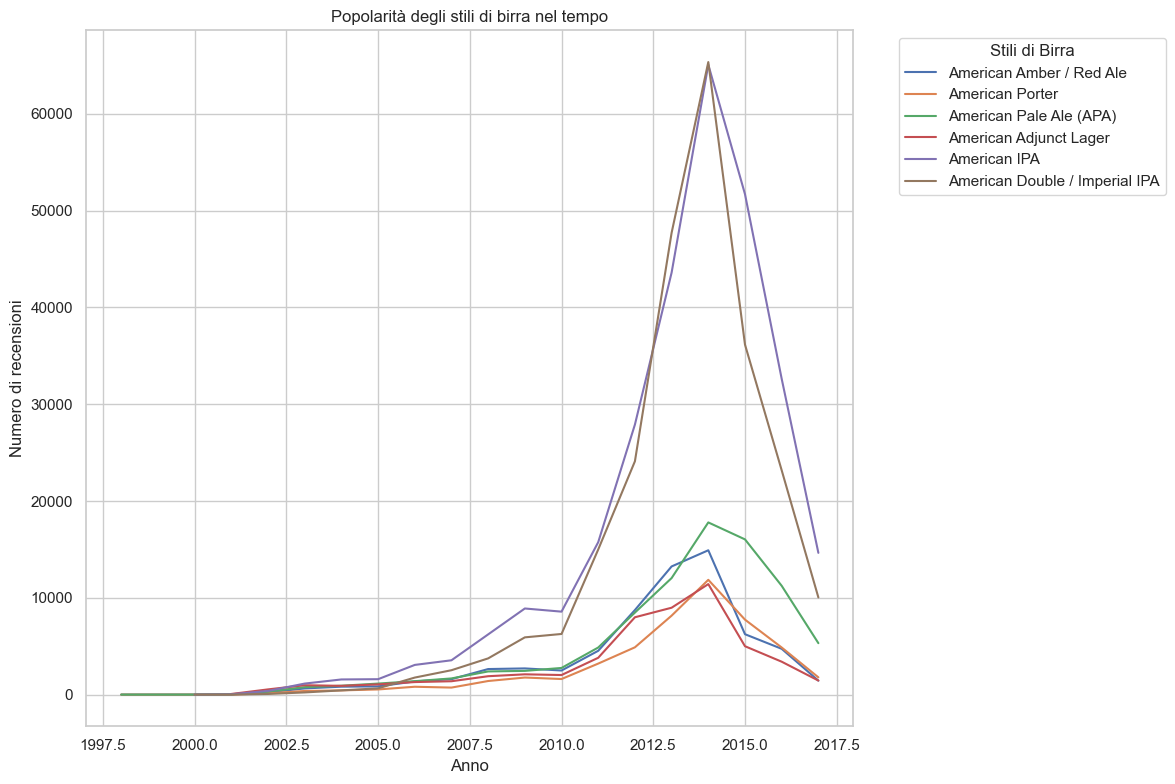

I 10 stili di birra con la valutazione media più alta:
style
American Wild Ale                   4.291529
American Double / Imperial IPA      4.190630
American Double / Imperial Stout    4.168303
Russian Imperial Stout              4.149716
Weizenbock                          4.137977
Eisbock                             4.131021
English Barleywine                  4.124009
Belgian Strong Dark Ale             4.115343
Belgian Strong Pale Ale             4.081948
Tripel                              4.079714
Name: average_rating, dtype: float64


In [278]:
# 1. Group data by year and beer style
style_review_count = reviews_df.groupby(['year', 'style', 'location_user']).size().reset_index(name='review_count')
style_review_count = style_review_count[style_review_count['location_user'] == 'United States']

# 2. Calculate the average rating for each style by year
style_avg_ratings = reviews_df.groupby(['year', 'style'])['rating'].mean().reset_index(name='average_rating')

# 3. Find the most reviewed style for each year
most_reviewed_style_idx = style_review_count.groupby('year')['review_count'].idxmax()
most_reviewed_style = style_review_count.loc[most_reviewed_style_idx]

# 4. Merge the most reviewed style data with average ratings
style_analysis = pd.merge(most_reviewed_style, style_avg_ratings, on=['year', 'style'], how='left')

# 5. Plot the popularity of beer styles over time
fig, ax = plt.subplots(figsize=(12, 8))

# Plot the popularity of beer styles over time (number of reviews)
for style in style_analysis['style'].unique():
    style_data = style_review_count[style_review_count['style'] == style]
    ax.plot(style_data['year'], style_data['review_count'], label=style)

ax.set_title('Popularity of Beer Styles Over Time')
ax.set_xlabel('Year')
ax.set_ylabel('Number of Reviews')
ax.legend(title="Beer Styles", bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.tight_layout()
plt.show()

# 6. Calculate the average rating for each style (without grouping by year)
top_rated_styles = style_avg_ratings.groupby('style')['average_rating'].mean().sort_values(ascending=False).head(10)
print("The 10 Beer Styles with the Highest Average Rating:")
print(top_rated_styles)


Correlazione tra anno e valutazione media ponderata:
                         year  weighted_avg_rating
year                 1.000000             0.458576
weighted_avg_rating  0.458576             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_13349/4019104613.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_year =filtered_reviews_y.groupby('year').apply(


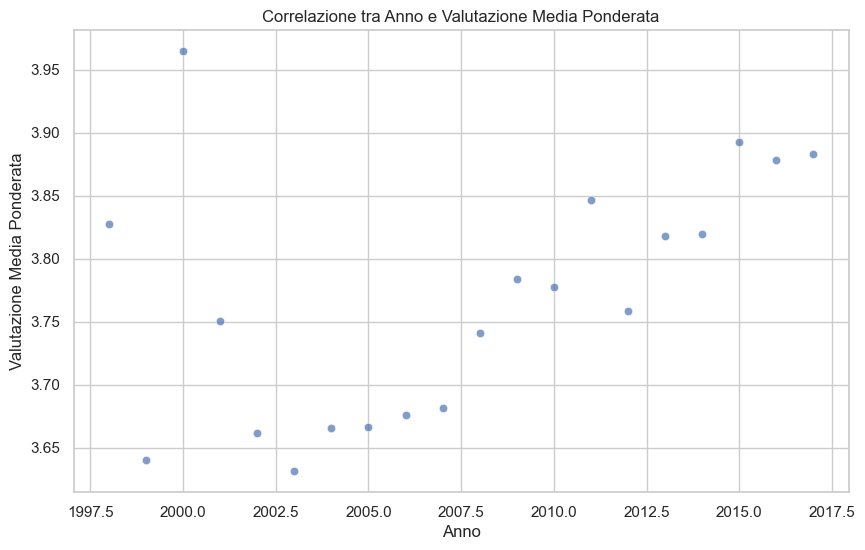

In [632]:
# Group data by year and calculate the total number of reviews per year
review_counts_y = reviews_df.groupby(['year']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year
reviews_with_counts_y = pd.merge(reviews_df, review_counts_y, on=['year'])

# Filter reviews where the review count per year is greater than or equal to 5
filtered_reviews_y = reviews_with_counts_y[reviews_with_counts_y['review_count'] >= 5]

# Calculate the weighted average rating per year
weighted_avg_year = filtered_reviews_y.groupby('year').apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Calculate the correlation between the year and the weighted average rating
correlation_year_score = weighted_avg_year[['year', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between year and weighted average rating:")
print(correlation_year_score)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_year, x='year', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between Year and Weighted Average Rating')
plt.xlabel('Year')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()


Correlazione tra anno e valutazione media ponderata:
                         year  location_user_code  weighted_avg_rating
year                 1.000000            0.447303             0.162882
location_user_code   0.447303            1.000000            -0.012134
weighted_avg_rating  0.162882           -0.012134             1.000000


/var/folders/np/3hhzvb2x6znbzvj6ph2phb8h0000gn/T/ipykernel_30173/534838547.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  weighted_avg_year = filtered_reviews_y.groupby(['year', 'location_user']).apply(


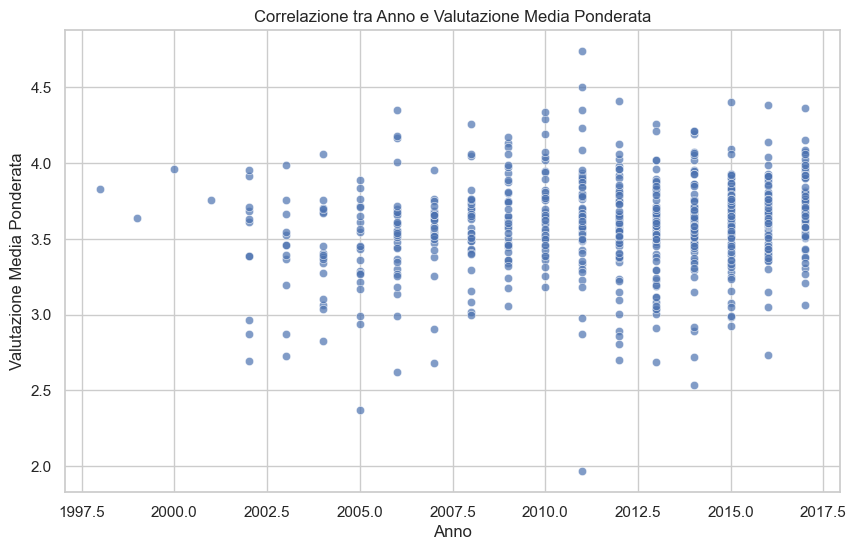

In [133]:
# Group data by year and location, and count the number of reviews for each combination
review_counts_y = reviews_df.groupby(['year', 'location_user']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year and location_user
reviews_with_counts_y = pd.merge(reviews_df, review_counts_y, on=['year', 'location_user'])

# Filter reviews where the review count per year and location is greater than or equal to 5
filtered_reviews_y = reviews_with_counts_y[reviews_with_counts_y['review_count'] >= 5]

# Calculate the weighted average rating per year and location_user
weighted_avg_year = filtered_reviews_y.groupby(['year', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Encode location_user as a numerical code for correlation calculation
weighted_avg_year['location_user_code'] = pd.factorize(weighted_avg_year['location_user'])[0]

# Calculate the correlation between year, location_user_code, and weighted average rating
correlation_year_score = weighted_avg_year[['year', 'location_user_code', 'weighted_avg_rating']].corr()

# Display the correlation matrix
print("Correlation between year, Location of the user and weighted average rating:")
print(correlation_year_score)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_year, x='year', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between Year, Location of the user and Weighted Average Rating')
plt.xlabel('Year')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()


In [ ]:
# Group data by year and location, and count the number of reviews for each combination
review_counts_y = reviews_df.groupby(['year', 'location_user','style']).size().reset_index(name='review_count')

# Merge the reviews data with the review count data based on the year and location_user
reviews_with_counts_y = pd.merge(reviews_df, review_counts_y, on=['year', 'location_user','style'])

# Filter reviews where the review count per year and location is greater than or equal to 5
filtered_reviews_y = reviews_with_counts_y[reviews_with_counts_y['review_count'] >= 5]

# Calculate the weighted average rating per year and location_user
weighted_avg_year = filtered_reviews_y.groupby(['year', 'location_user']).apply(
    lambda x: (x['rating'] * x['review_count']).sum() / x['review_count'].sum()
).reset_index(name='weighted_avg_rating')

# Encode location_user as a numerical code for correlation calculation
weighted_avg_year['location_user_code'] = pd.factorize(weighted_avg_year['location_user'])[0]
weighted_avg_year['style_code'] = pd.factorize(weighted_avg_year['style'])[0]

# Calculate the correlation between year, location_user_code, and weighted average rating
correlation_year_score = weighted_avg_year[['year', 'location_user_code', 'weighted_avg_rating','style_code']].corr()

# Display the correlation matrix
print("Correlation between year,location of the user, style and weighted average rating:")
print(correlation_year_score)

# Display a scatter plot to better understand the relationship
plt.figure(figsize=(10, 6))
sns.scatterplot(data=weighted_avg_year, x='year', y='weighted_avg_rating', alpha=0.7)
plt.title('Correlation between year,location of the user, style and weighted average rating')
plt.xlabel('Year')
plt.ylabel('Weighted Average Rating')
plt.grid(True)
plt.show()
